In [3]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

### Load Data of Dow Jones from 2002.06.13-2022.06.13

In [4]:
start_day = datetime.datetime(2002,6,13)
end_day = datetime.datetime(2022,6,13)
dj1 = web.get_data_stooq('^DJI',start_day,end_day)

In [5]:
len(dj1)

5036

In [6]:
dj1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5036 entries, 2022-06-13 to 2002-06-13
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5036 non-null   float64
 1   High    5036 non-null   float64
 2   Low     5036 non-null   float64
 3   Close   5036 non-null   float64
 4   Volume  5036 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 236.1 KB


In [7]:
dj1.sort_index(ascending=True,inplace=True)

In [8]:
dj1['Close_1'] = dj1['Close'].shift(-1)

In [9]:
dj1

Open      High       Low     Close     Volume   Close_1
Date                                                                   
2002-06-13   9612.87   9625.40   9491.86   9502.80  227552955   9474.21
2002-06-14   9498.92   9498.92   9260.99   9474.21  287001167   9687.42
2002-06-17   9476.50   9687.77   9476.50   9687.42  247554505   9706.12
2002-06-18   9684.52   9721.75   9636.96   9706.12  212707042   9561.57
2002-06-19   9702.00   9733.39   9542.74   9561.57  248083566   9431.77
...              ...       ...       ...       ...        ...       ...
2022-06-07  32783.03  33207.45  32641.85  33180.14  327463783  32910.90
2022-06-08  33087.07  33156.50  32824.37  32910.90  314420559  32272.79
2022-06-09  32828.62  32956.73  32267.78  32272.79  331546530  31392.79
2022-06-10  32053.52  32053.52  31387.84  31392.79  411949075  30516.74
2022-06-13  31144.91  31144.91  30373.72  30516.74  526922052       NaN

[5036 rows x 6 columns]

In [10]:
from sklearn.feature_selection import mutual_info_regression

### Define time lags for variables

In [11]:
d = range(0,31)

In [12]:
high_lag = pd.DataFrame(dj1['High'])
for i in d[1:]:
    column = 'high_lag_'+str(i)
    high_lag[column] = dj1['High'].shift(i)
    
open_lag = pd.DataFrame(dj1['Open'])
for i in d[1:]:
    column = 'open_lag_'+str(i)
    open_lag[column] = dj1['Open'].shift(i)
    
low_lag = pd.DataFrame(dj1['Low'])
for i in d[1:]:
    column = 'low_lag_'+str(i)
    low_lag[column] = dj1['Low'].shift(i)
    
vol_lag = pd.DataFrame(dj1['Volume'])
for i in range(1,31):
    column = 'vol_lag_'+str(i)
    vol_lag[column] = dj1['Volume'].shift(i)

Combine all features and targets into a DataFrame

In [13]:
F = pd.concat([high_lag,open_lag,low_lag,vol_lag,dj1['Close_1']],axis=1)
F

High  high_lag_1  high_lag_2  high_lag_3  high_lag_4  \
Date                                                                   
2002-06-13   9625.40         NaN         NaN         NaN         NaN   
2002-06-14   9498.92     9625.40         NaN         NaN         NaN   
2002-06-17   9687.77     9498.92     9625.40         NaN         NaN   
2002-06-18   9721.75     9687.77     9498.92     9625.40         NaN   
2002-06-19   9733.39     9721.75     9687.77     9498.92     9625.40   
...              ...         ...         ...         ...         ...   
2022-06-07  33207.45    33235.37    33135.61    33248.61    33272.34   
2022-06-08  33156.50    33207.45    33235.37    33135.61    33248.61   
2022-06-09  32956.73    33156.50    33207.45    33235.37    33135.61   
2022-06-10  32053.52    32956.73    33156.50    33207.45    33235.37   
2022-06-13  31144.91    32053.52    32956.73    33156.50    33207.45   

            high_lag_5  high_lag_6  high_lag_7  high_lag_8  high_lag_9  ...  \
Date                                                                    ...   
2002-06-13         NaN         NaN         NaN         NaN         NaN  ...   
2002-06-14         NaN         NaN         NaN         NaN         NaN  ...   
2002-06-17         NaN         NaN         NaN         NaN         NaN  ...   
2002-06-18         NaN         NaN         NaN         NaN         NaN  ...   
2002-06-19         NaN         NaN         NaN         NaN         NaN  ...   
...                ...         ...         ...         ...         ...  ...   
2022-06-07    33240.22    33213.62    32774.14    32254.44    32014.86  ...   
2022-06-08    33272.34    33240.22    33213.62    32774.14    32254.44  ...   
2022-06-09    33248.61    33272.34    33240.22    33213.62    32774.14  ...   
2022-06-10    33135.61    33248.61    33272.34    33240.22    33213.62  ...   
2022-06-13    33235.37    33135.61    33248.61    33272.34    33240.22  ...   

             vol_lag_22   vol_lag_23   vol_lag_24   vol_lag_25   vol_lag_26  \
Date                                                                          
2002-06-13          NaN          NaN          NaN          NaN          NaN   
2002-06-14          NaN          NaN          NaN          NaN          NaN   
2002-06-17          NaN          NaN          NaN          NaN          NaN   
2002-06-18          NaN          NaN          NaN          NaN          NaN   
2002-06-19          NaN          NaN          NaN          NaN          NaN   
...                 ...          ...          ...          ...          ...   
2022-06-07  507031169.0  479098068.0  425820730.0  516891401.0  552952031.0   
2022-06-08  457941820.0  507031169.0  479098068.0  425820730.0  516891401.0   
2022-06-09  535207901.0  457941820.0  507031169.0  479098068.0  425820730.0   
2022-06-10  493371858.0  535207901.0  457941820.0  507031169.0  479098068.0   
2022-06-13  521732651.0  493371858.0  535207901.0  457941820.0  507031169.0   

             vol_lag_27   vol_lag_28   vol_lag_29   vol_lag_30   Close_1  
Date                                                                      
2002-06-13          NaN          NaN          NaN          NaN   9474.21  
2002-06-14          NaN          NaN          NaN          NaN   9687.42  
2002-06-17          NaN          NaN          NaN          NaN   9706.12  
2002-06-18          NaN          NaN          NaN          NaN   9561.57  
2002-06-19          NaN          NaN          NaN          NaN   9431.77  
...                 ...          ...          ...          ...       ...  
2022-06-07  510766945.0  507356836.0  456006869.0  477810060.0  32910.90  
2022-06-08  552952031.0  510766945.0  507356836.0  456006869.0  32272.79  
2022-06-09  516891401.0  552952031.0  510766945.0  507356836.0  31392.79  
2022-06-10  425820730.0  516891401.0  552952031.0  510766945.0  30516.74  
2022-06-13  479098068.0  425820730.0  516891401.0  552952031.0       NaN  

[5036 rows x 125 columns]

In [9]:
F.to_csv("Features_with_lags(1-30)_with_Close.csv")

In [11]:
Correlation_Matrix = F.corr()

In [12]:
Correlation_Matrix.iloc[-1,:]

High          0.999547
high_lag_1    0.999267
high_lag_2    0.998952
high_lag_3    0.998664
high_lag_4    0.998368
                ...   
vol_lag_27    0.403285
vol_lag_28    0.403360
vol_lag_29    0.403111
vol_lag_30    0.402911
Close_1       1.000000
Name: Close_1, Length: 125, dtype: float64

Text(0.5, 1.0, 'Correlation Coefficient between each feature and the target')

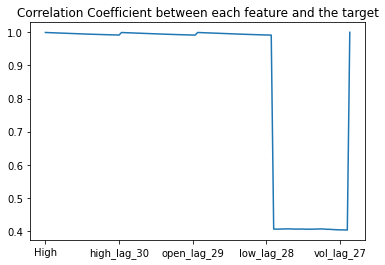

In [13]:
plt.plot(Correlation_Matrix.iloc[-1,:])
plt.xticks(list(Correlation_Matrix.columns)[::30])
plt.title("Correlation Coefficient between each feature and the target")

In [14]:
Correlation_Matrix.to_csv("Correlation between variables and the target.csv")

Text(0.5, 1.0, 'Correlation Heatmap')

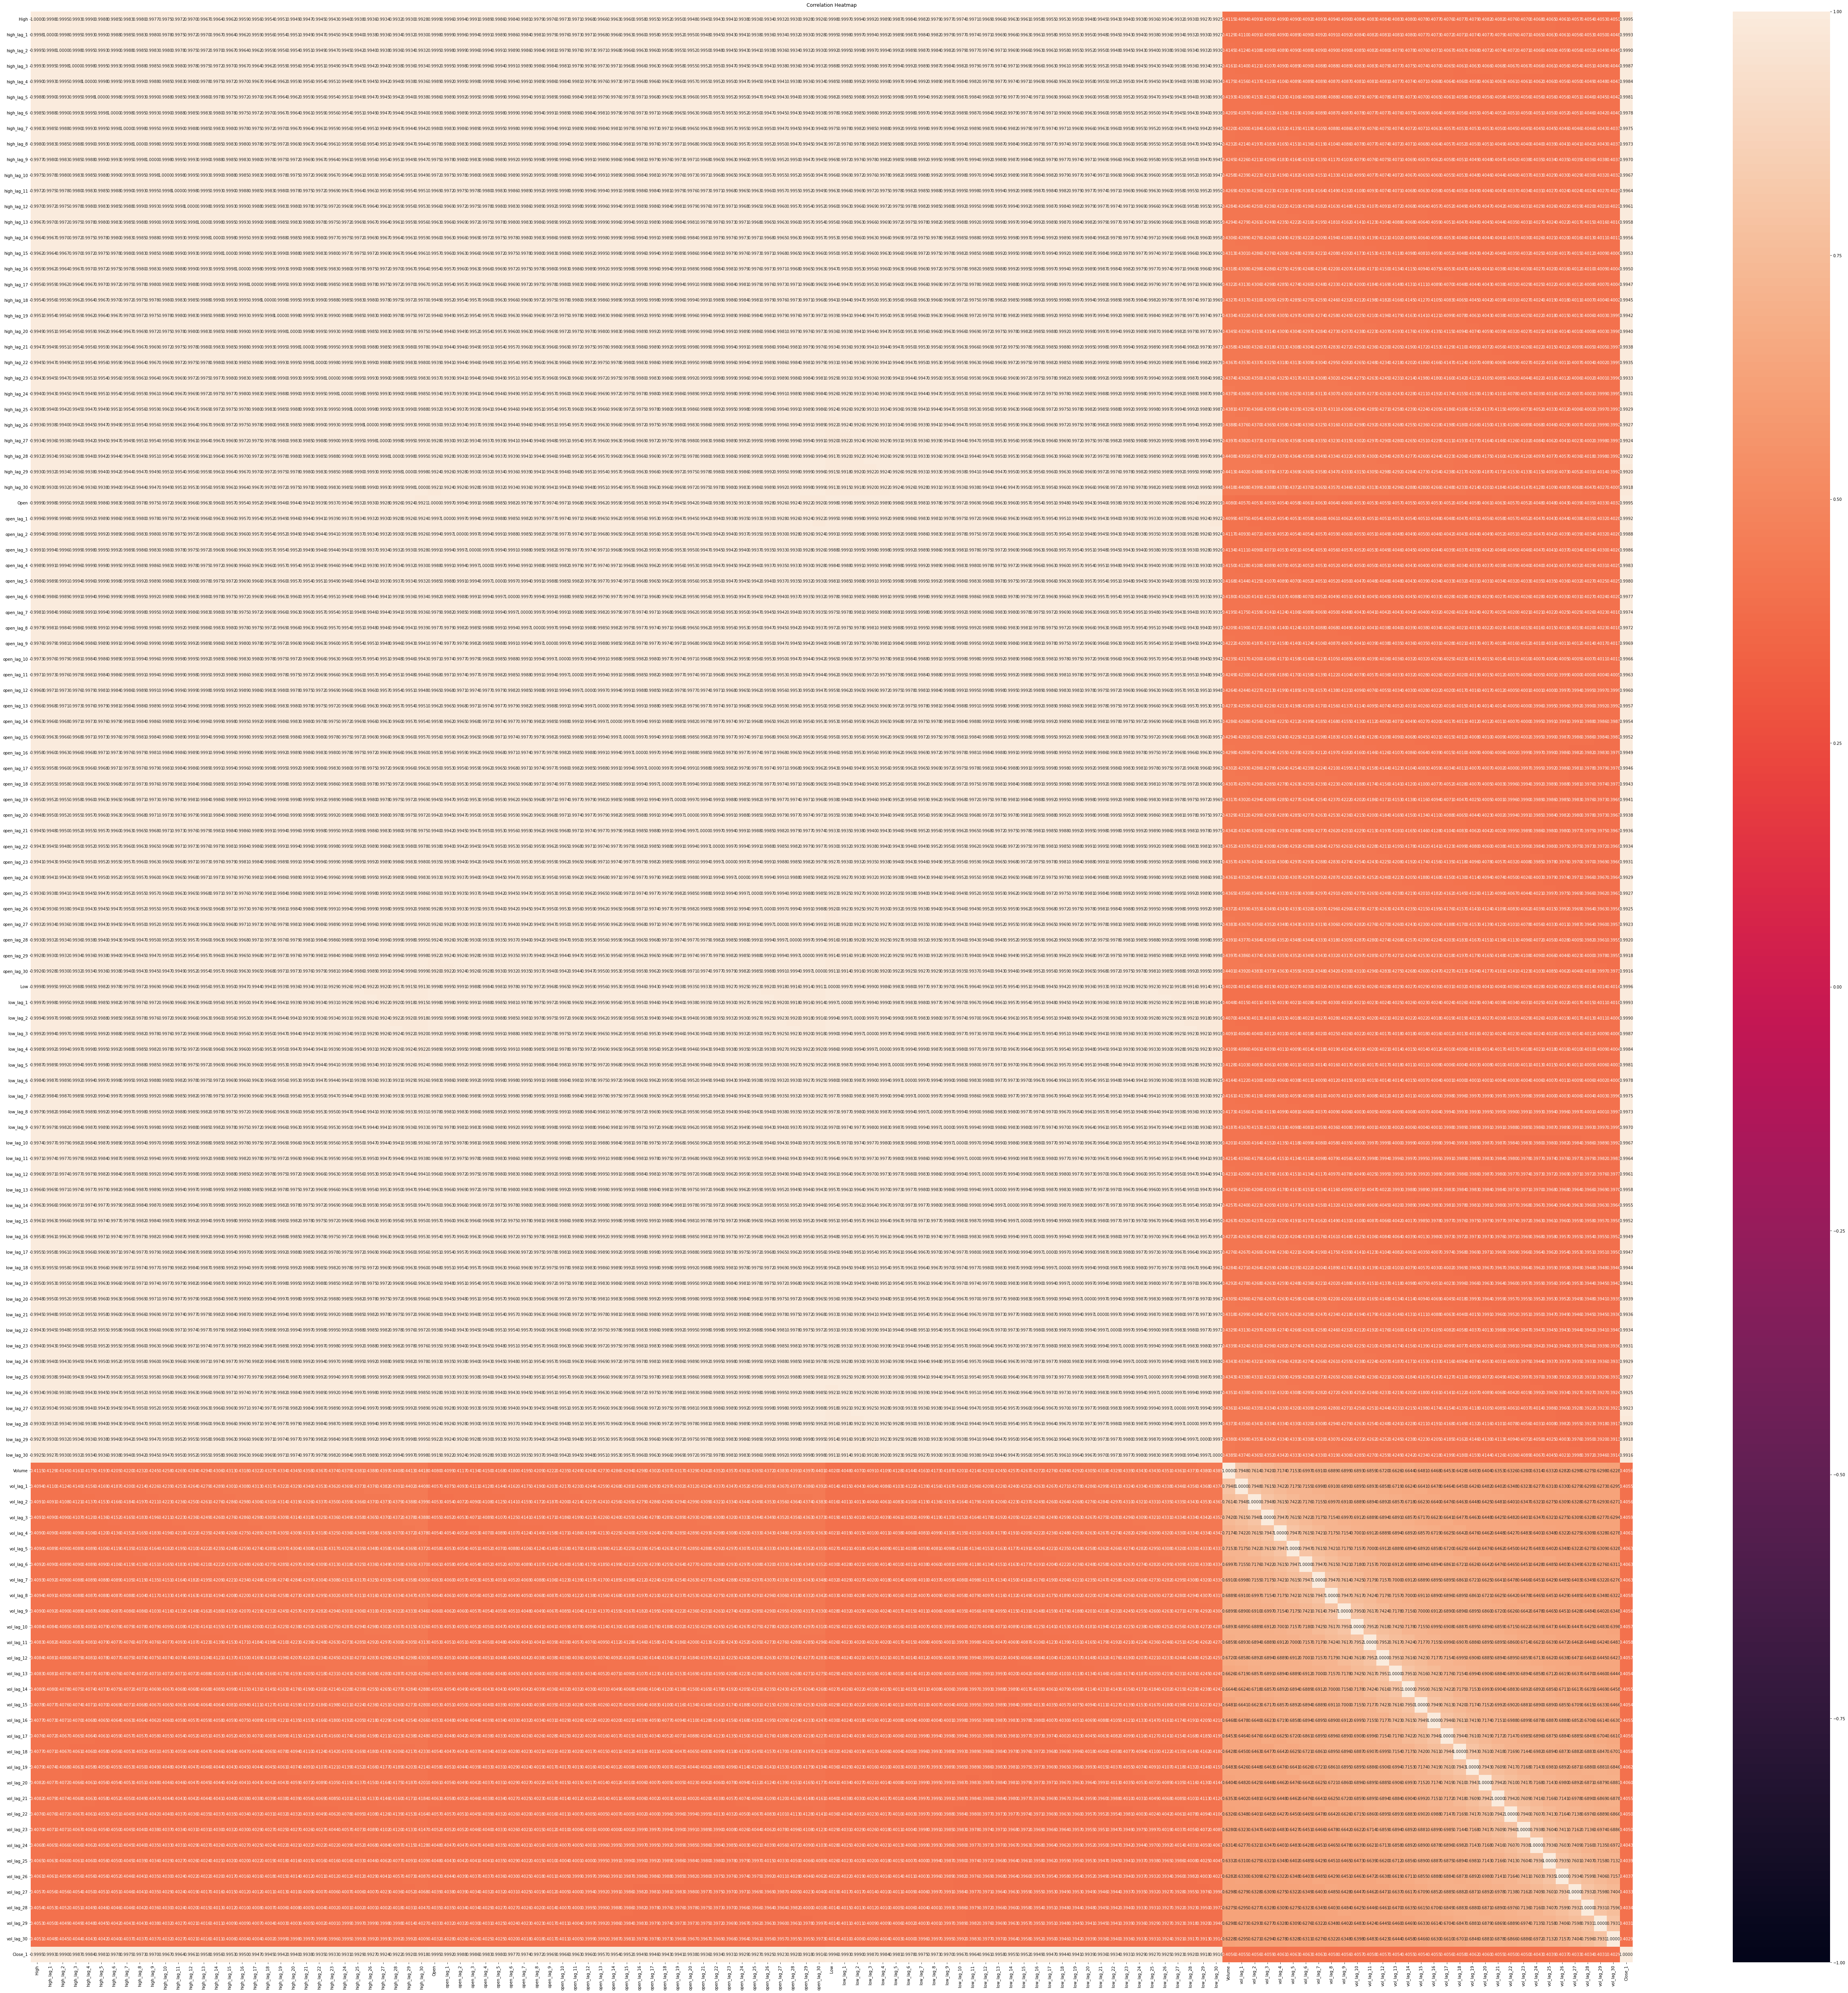

In [410]:
import seaborn as sns
plt.figure(figsize=(90, 90))
heatmap = sns.heatmap(Correlation_Matrix, vmin=-1, vmax=1,fmt=".4f", annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

### MIC Method

In [14]:
from minepy import MINE
from minepy import pstats, cstats

In [15]:
X = np.array(F.iloc[30:-1,:-1])
Y = np.array(F.iloc[30:-1,-1]).reshape((-1,1))
SC_X = MinMaxScaler(feature_range=(0,1))
SC_Y = MinMaxScaler(feature_range=(0,1))
x_mic = SC_X.fit_transform(X)
y_mic = SC_Y.fit_transform(Y).reshape((-1,))

In [16]:
mine = MINE()
mic_scores = {}
for i in range(x_mic.shape[1]):
    mine.compute_score(x_mic[:, i], y_mic)
    m = mine.mic()
    mic_scores[F.columns[i]] = m

In [17]:
mic_scores = pd.Series(mic_scores)

In [18]:
mic_scores.sort_values(ascending=False,inplace=True)

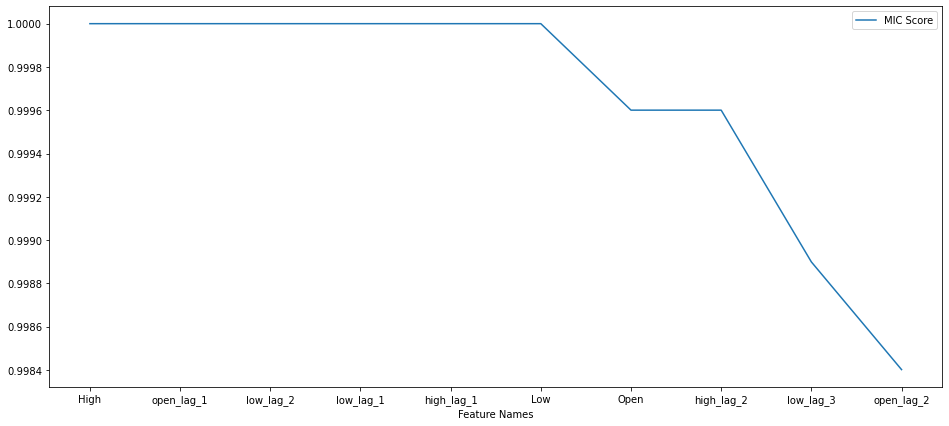

In [40]:
plt.figure(figsize = (16,7))
plt.plot(mic_scores[:10],label='MIC Score')
plt.legend()
plt.xlabel("Feature Names")
plt.savefig("MIC_features.svg")

In [41]:
mic_features = mic_scores.index[:6]

In [42]:
mic_features

Index(['High', 'open_lag_1', 'low_lag_2', 'low_lag_1', 'high_lag_1', 'Low'], dtype='object')

In [43]:
list(mic_features)

['High', 'open_lag_1', 'low_lag_2', 'low_lag_1', 'high_lag_1', 'Low']

In [44]:
F[list(mic_features)+['Close_1']].to_csv("features_on_mic.csv")

In [45]:
cols = list(F.columns)
feature_idx = []
for i in range(len(mic_features)):
    feature_idx.append(cols.index(mic_features[i]))

In [46]:
feature_idx

[0, 32, 64, 63, 1, 62]

In [47]:
features = np.array([x_mic[:,i] for i in feature_idx])

In [48]:
test = np.reshape(features,(features.shape[0],features.shape[1],1))

LTSM Prediction

In [74]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [58]:
features = np.array([x_mic[:,i] for i in feature_idx]).T
x_m = np.reshape(features, (features.shape[0], features.shape[1], 1))
y_m = y_mic.reshape((-1,1))
test_len = int(len(x_m)*0.7)
X_train_m = x_m[:test_len,:]
X_test_m = x_m[test_len:,:]
y_train_m = y_m[:test_len]
y_test_m = y_m[test_len:]

In [99]:
mic_lstm = Sequential()
mic_lstm.add(LSTM(50,return_sequences = True))
# 添加 Dropout 隐藏层 防止过拟合
mic_lstm.add(Dropout(0.2))

# 添加 含有 30 个单元的 LSTM 网络(第二层)
mic_lstm.add(LSTM(30,return_sequences = True))
# 添加 Dropout 隐藏层 防止过拟合
mic_lstm.add(Dropout(0.2))

# 添加 含有 10 个单元的 LSTM 网络(第三层)
# 注意，最后一层没有 return_sequences = True ！！！
mic_lstm.add(LSTM(10))
# 添加 Dropout 隐藏层 防|止过拟合
mic_lstm.add(Dropout(0.2))

# 添加输出层网络以输出预测的股票收盘价格
mic_lstm.add(Dense(1))

In [100]:
mic_lstm.compile(optimizer='adam', loss='mean_squared_error')
mic_lstm.fit(X_train_m, y_train_m, batch_size=32, epochs=100)

Epoch 1/100
110/110 [==============================] - 7s 10ms/step - loss: 0.0074
Epoch 2/100
110/110 [==============================] - 1s 10ms/step - loss: 0.0014
Epoch 3/100
110/110 [==============================] - 1s 9ms/step - loss: 0.0011
Epoch 4/100
110/110 [==============================] - 1s 10ms/step - loss: 8.4072e-04
Epoch 5/100
110/110 [==============================] - 1s 9ms/step - loss: 7.1570e-04
Epoch 6/100
110/110 [==============================] - 1s 9ms/step - loss: 6.1411e-04
Epoch 7/100
110/110 [==============================] - 1s 9ms/step - loss: 5.1317e-04
Epoch 8/100
110/110 [==============================] - 1s 9ms/step - loss: 5.1264e-04
Epoch 9/100
110/110 [==============================] - 1s 9ms/step - loss: 4.3726e-04
Epoch 10/100
110/110 [==============================] - 1s 9ms/step - loss: 3.8419e-04
Epoch 11/100
110/110 [==============================] - 1s 9ms/step - loss: 3.8942e-04
Epoch 12/100
110/110 [==============================] - 1s 9m

In [101]:
y_pred_m = mic_lstm.predict(X_test_m)

In [102]:
print("mean_absolute_error:", mean_absolute_error(y_test_m, y_pred_m))
print("mean_squared_error:", mean_squared_error(y_test_m, y_pred_m))
print("rmse:", sqrt(mean_squared_error(y_test_m, y_pred_m)))
print("r2 score:", r2_score(y_test_m, y_pred_m))

mean_absolute_error: 0.18695489775716478
mean_squared_error: 0.057485136336225824
rmse: 0.23976058128104757
r2 score: -1.05245701824597


In [396]:
test_len

3503

In [395]:
# 3532 - 5034 = (test_len + 30):-1
y_pred_m

1502

In [104]:
F['MIC_LSTM'] = F['Close_1'].copy()

In [105]:
Y_pred_inverse = SC_Y.inverse_transform(y_pred_m)

In [112]:
Y_pred_inverse.shape

(1502, 1)

In [109]:
len(F['Close_1'][test_len+30:-1])

1502

In [113]:
F['MIC_LSTM'][test_len+30:-1] = Y_pred_inverse.reshape((-1,))

C:\Users\rich\AppData\Local\Temp/ipykernel_18464/3656003993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  F['MIC_LSTM'][test_len+30:-1] = Y_pred_inverse.reshape((-1,))


In [115]:
F['MIC_LSTM'][test_len+30:-1] 

Date
2016-06-24    17644.216797
2016-06-27    17471.906250
2016-06-28    17183.011719
2016-06-29    17191.626953
2016-06-30    17391.156250
                  ...     
2022-06-06    21450.455078
2022-06-07    21439.060547
2022-06-08    21447.150391
2022-06-09    21464.212891
2022-06-10    21531.404297
Name: MIC_LSTM, Length: 1502, dtype: float64

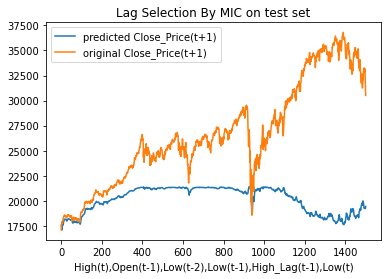

<Figure size 432x288 with 0 Axes>

In [400]:
plt.title('Lag Selection By MIC on test set')
plt.plot(SC_Y.inverse_transform(y_pred_m),label='predicted Close_Price(t+1)')
plt.plot(SC_Y.inverse_transform(y_test_m),label='original Close_Price(t+1)')
plt.xlabel('High(t),Open(t-1),Low(t-2),Low(t-1),High_Lag(t-1),Low(t)')
plt.legend()
plt.show()
plt.savefig('MIC.png')

### Lasso Regression

In [36]:
from sklearn.linear_model import (LinearRegression,Ridge, Lasso)

In [426]:
features[:test_len,:]

3503

In [434]:
lasso = Lasso(alpha=10**(-3))
lasso.fit(X[:test_len,:], y_train_m)
lasso.coef_

array([0.4177464 , 0.        , 0.        , 0.        , 0.        ,
       0.47018404])

#### Linear Regression

In [27]:
from sklearn.linear_model import (LinearRegression,Ridge, Lasso)
from math import sqrt

In [28]:
clf = LinearRegression(n_jobs=-1)

In [61]:
X_train_li = features[:test_len]
Y_train_li = y_mic[:test_len]

In [62]:
X_train_li.shape

(3503, 6)

In [63]:
Y_train_li.shape

(3503,)

In [64]:
X_test_li = features[test_len:]
Y_test_li = y_mic[test_len:]

In [65]:
X_train_li.shape

(3503, 6)

In [66]:
clf.fit(X_train_li,Y_train_li)

LinearRegression(n_jobs=-1)

In [67]:
accuracy = clf.score(X_train_li,Y_train_li)

In [68]:
Y_test_li

array([0.350158  , 0.35906567, 0.36848502, ..., 0.8503646 , 0.82127619,
       0.79231835])

In [70]:
foreca_set = clf.predict(X_test_li)

In [71]:
foreca_set

array([0.36371191, 0.35044971, 0.35778465, ..., 0.87300442, 0.85903804,
       0.82430623])

In [86]:
F['MIC Prediction'] = F['Close_1']

In [117]:
F.rename(columns = {'MIC Prediction':'MIC_LR'},inplace=True)

In [118]:
F.columns

Index(['High', 'high_lag_1', 'high_lag_2', 'high_lag_3', 'high_lag_4',
       'high_lag_5', 'high_lag_6', 'high_lag_7', 'high_lag_8', 'high_lag_9',
       ...
       'vol_lag_24', 'vol_lag_25', 'vol_lag_26', 'vol_lag_27', 'vol_lag_28',
       'vol_lag_29', 'vol_lag_30', 'Close_1', 'MIC_LR', 'MIC_LSTM'],
      dtype='object', length=127)

In [90]:
len(SC_Y.inverse_transform(foreca_set.reshape((-1,1))))

1502

In [92]:
F['MIC Prediction'][test_len+30:-1] = SC_Y.inverse_transform(foreca_set.reshape((-1,1))).reshape(-1,)

C:\Users\rich\AppData\Local\Temp/ipykernel_18464/1480886556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  F['MIC Prediction'][test_len+30:-1] = SC_Y.inverse_transform(foreca_set.reshape((-1,1))).reshape(-1,)


In [93]:
F['MIC Prediction'][test_len+30:-1]

Date
2016-06-24    17550.280806
2016-06-27    17149.064865
2016-06-28    17370.966027
2016-06-29    17647.515320
2016-06-30    17875.884336
                  ...     
2022-06-06    33054.518520
2022-06-07    32896.538739
2022-06-08    32957.703413
2022-06-09    32535.184359
2022-06-10    31484.456722
Name: MIC Prediction, Length: 1502, dtype: float64

([<matplotlib.axis.XTick at 0x2345d44a9a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

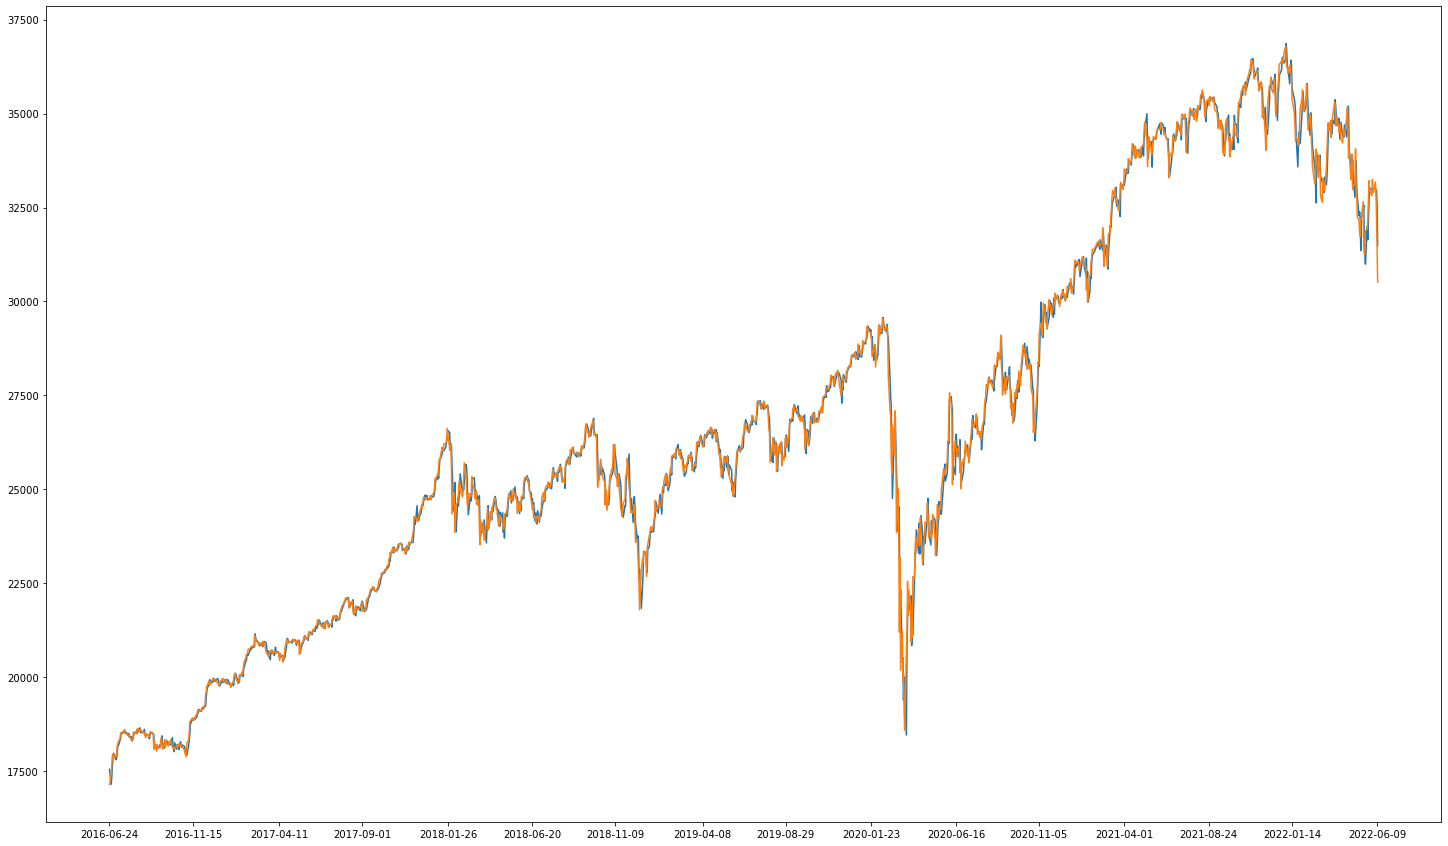

In [98]:
plt.figure(figsize=(25,15))
plt.plot(F['MIC Prediction'][test_len+30:-1],label = 'Original')
plt.plot(F['Close_1'][test_len+30:-1],label = 'Predicted')
plt.xticks(F.index[test_len+30:-1:100])

In [75]:
print("mean_absolute_error:", mean_absolute_error(Y_test_li, foreca_set))
print("mean_squared_error:", mean_squared_error(Y_test_li, foreca_set))
print("rmse:", sqrt(mean_squared_error(Y_test_li, foreca_set)))
print("r2 score:", r2_score(Y_test_li, foreca_set))

mean_absolute_error: 0.006915181512367742
mean_squared_error: 0.00011723377310189569
rmse: 0.010827454599392033
r2 score: 0.9958142696405713


### Ridge Regression

In [119]:
clf_Ridge = Ridge(alpha=1.0, fit_intercept=True)

In [120]:
clf_Ridge.fit(X_train_li,Y_train_li)

Ridge()

In [121]:
y_pred_ri = clf_Ridge.predict(X_test_li)

In [124]:
print("mean_absolute_error:", mean_absolute_error(Y_test_li, y_pred_ri))
print("mean_squared_error:", mean_squared_error(Y_test_li, y_pred_ri))
print("rmse:", sqrt(mean_squared_error(Y_test_li, y_pred_ri)))
print("r2 score:", r2_score(Y_test_li, y_pred_ri))

mean_absolute_error: 0.008976721630458082
mean_squared_error: 0.00016876856331913761
rmse: 0.012991095539604718
r2 score: 0.9939742645782791


In [125]:
y_pred_ri.shape

(1502,)

In [127]:
F['MIC_Ridge'] = F['Close_1']

In [129]:
F['MIC_Ridge'][test_len+30:-1] = SC_Y.inverse_transform(y_pred_ri.reshape((-1,1))).reshape(-1,)

C:\Users\rich\AppData\Local\Temp/ipykernel_18464/3102310179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  F['MIC_Ridge'][test_len+30:-1] = SC_Y.inverse_transform(y_pred_ri.reshape((-1,1))).reshape(-1,)


In [130]:
plt.plot(F['Close_1'])
plt.plot(F['MIC_LSTM'])
plt.plot(F['MIC_'])

Date
2002-06-13     9474.210000
2002-06-14     9687.420000
2002-06-17     9706.120000
2002-06-18     9561.570000
2002-06-19     9431.770000
                  ...     
2022-06-07    32860.002735
2022-06-08    32813.235710
2022-06-09    32708.013920
2022-06-10    32235.228746
2022-06-13             NaN
Name: MIC_Ridge, Length: 5036, dtype: float64

### SVM

In [133]:
from sklearn.svm import SVR 

In [134]:
svr_lin  = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)

In [135]:
svr_lin .fit(X_train_li,Y_train_li)
svr_poly.fit(X_train_li,Y_train_li)
svr_rbf.fit(X_train_li,Y_train_li)

SVR(C=1000.0, gamma=0.1)

In [136]:
y_lin = svr_lin.predict(X_test_li)
y_rbf = svr_rbf.predict(X_test_li)
y_poly = svr_poly.predict(X_test_li)

In [137]:
print("mean_absolute_error:", mean_absolute_error(Y_test_li,y_lin ))
print("mean_squared_error:", mean_squared_error(Y_test_li, y_lin ))
print("rmse:", sqrt(mean_squared_error(Y_test_li, y_lin )))
print("r2 score:", r2_score(Y_test_li, y_lin))

mean_absolute_error: 0.23475171329504166
mean_squared_error: 0.062110941044923
rmse: 0.24922066737115323
r2 score: -1.2176173700257693


In [138]:
print("mean_absolute_error:", mean_absolute_error(Y_test_li,y_rbf ))
print("mean_squared_error:", mean_squared_error(Y_test_li, y_rbf ))
print("rmse:", sqrt(mean_squared_error(Y_test_li, y_rbf )))
print("r2 score:", r2_score(Y_test_li, y_rbf))

mean_absolute_error: 0.268520187632749
mean_squared_error: 0.08553440924069025
rmse: 0.29246266298570534
r2 score: -2.0539320202837628


In [139]:
print("mean_absolute_error:", mean_absolute_error(Y_test_li,y_poly ))
print("mean_squared_error:", mean_squared_error(Y_test_li, y_poly ))
print("rmse:", sqrt(mean_squared_error(Y_test_li, y_poly )))
print("r2 score:", r2_score(Y_test_li, y_poly))

mean_absolute_error: 0.12886505524737812
mean_squared_error: 0.036354911438643965
rmse: 0.19066963953037716
r2 score: -0.2980206342997509


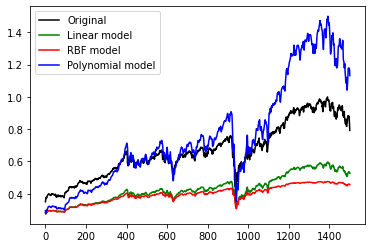

In [147]:
plt.plot(Y_test_li, c='k', label='Original')
plt.plot(y_lin, c='g', label='Linear model')
plt.plot(y_rbf, c='r', label='RBF model')    
plt.plot(y_poly, c='b', label='Polynomial model')
plt.legend()
plt.show()

In [148]:
F['MIC_SVR_Poly'] = F['Close_1']

In [149]:
F['MIC_SVR_Poly'][test_len+30:-1] = SC_Y.inverse_transform(y_poly.reshape((-1,1))).reshape(-1,)

C:\Users\rich\AppData\Local\Temp/ipykernel_18464/143484949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  F['MIC_SVR_Poly'][test_len+30:-1] = SC_Y.inverse_transform(y_poly.reshape((-1,1))).reshape(-1,)


In [155]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'bootstrap': [True, False], 
'random_state': [1, 2, 30, 42]
}
rscv = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=100)
rscv_fit = rscv.fit(X_train_li,Y_train_li)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [175]:
model = RandomForestRegressor(n_estimators=500, random_state=30, min_samples_split=10, min_samples_leaf=1, max_depth=13, bootstrap=True)
model.fit(X_train_li,Y_train_li)
y_rfr = model.predict(X_test_li)

In [176]:
y_rfr

array([0.36084007, 0.34269432, 0.36082833, ..., 0.38512239, 0.38512239,
       0.38512239])

In [177]:
print("mean_absolute_error:", mean_absolute_error(Y_test_li,y_rfr ))
print("mean_squared_error:", mean_squared_error(Y_test_li, y_rfr ))
print("rmse:", sqrt(mean_squared_error(Y_test_li, y_rfr )))
print("r2 score:", r2_score(Y_test_li, y_rfr))

mean_absolute_error: 0.27952126672883876
mean_squared_error: 0.10600464720437396
rmse: 0.3255835487311574
r2 score: -2.7848041422178507


In [178]:
F['MIC_RandomFRegressor'] = F['Close_1']
F['MIC_RandomFRegressor'][test_len+30:-1] = SC_Y.inverse_transform(y_rfr.reshape((-1,1))).reshape(-1,)

C:\Users\rich\AppData\Local\Temp/ipykernel_18464/3388246731.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  F['MIC_RandomFRegressor'][test_len+30:-1] = SC_Y.inverse_transform(y_rfr.reshape((-1,1))).reshape(-1,)


In [179]:
F['MIC_RandomFRegressor'][test_len+30:-1]

Date
2016-06-24    17463.400403
2016-06-27    16914.444160
2016-06-28    17463.045142
2016-06-29    17644.396192
2016-06-30    17736.667092
                  ...     
2022-06-06    18198.003737
2022-06-07    18198.003737
2022-06-08    18198.003737
2022-06-09    18198.003737
2022-06-10    18198.003737
Name: MIC_RandomFRegressor, Length: 1502, dtype: float64

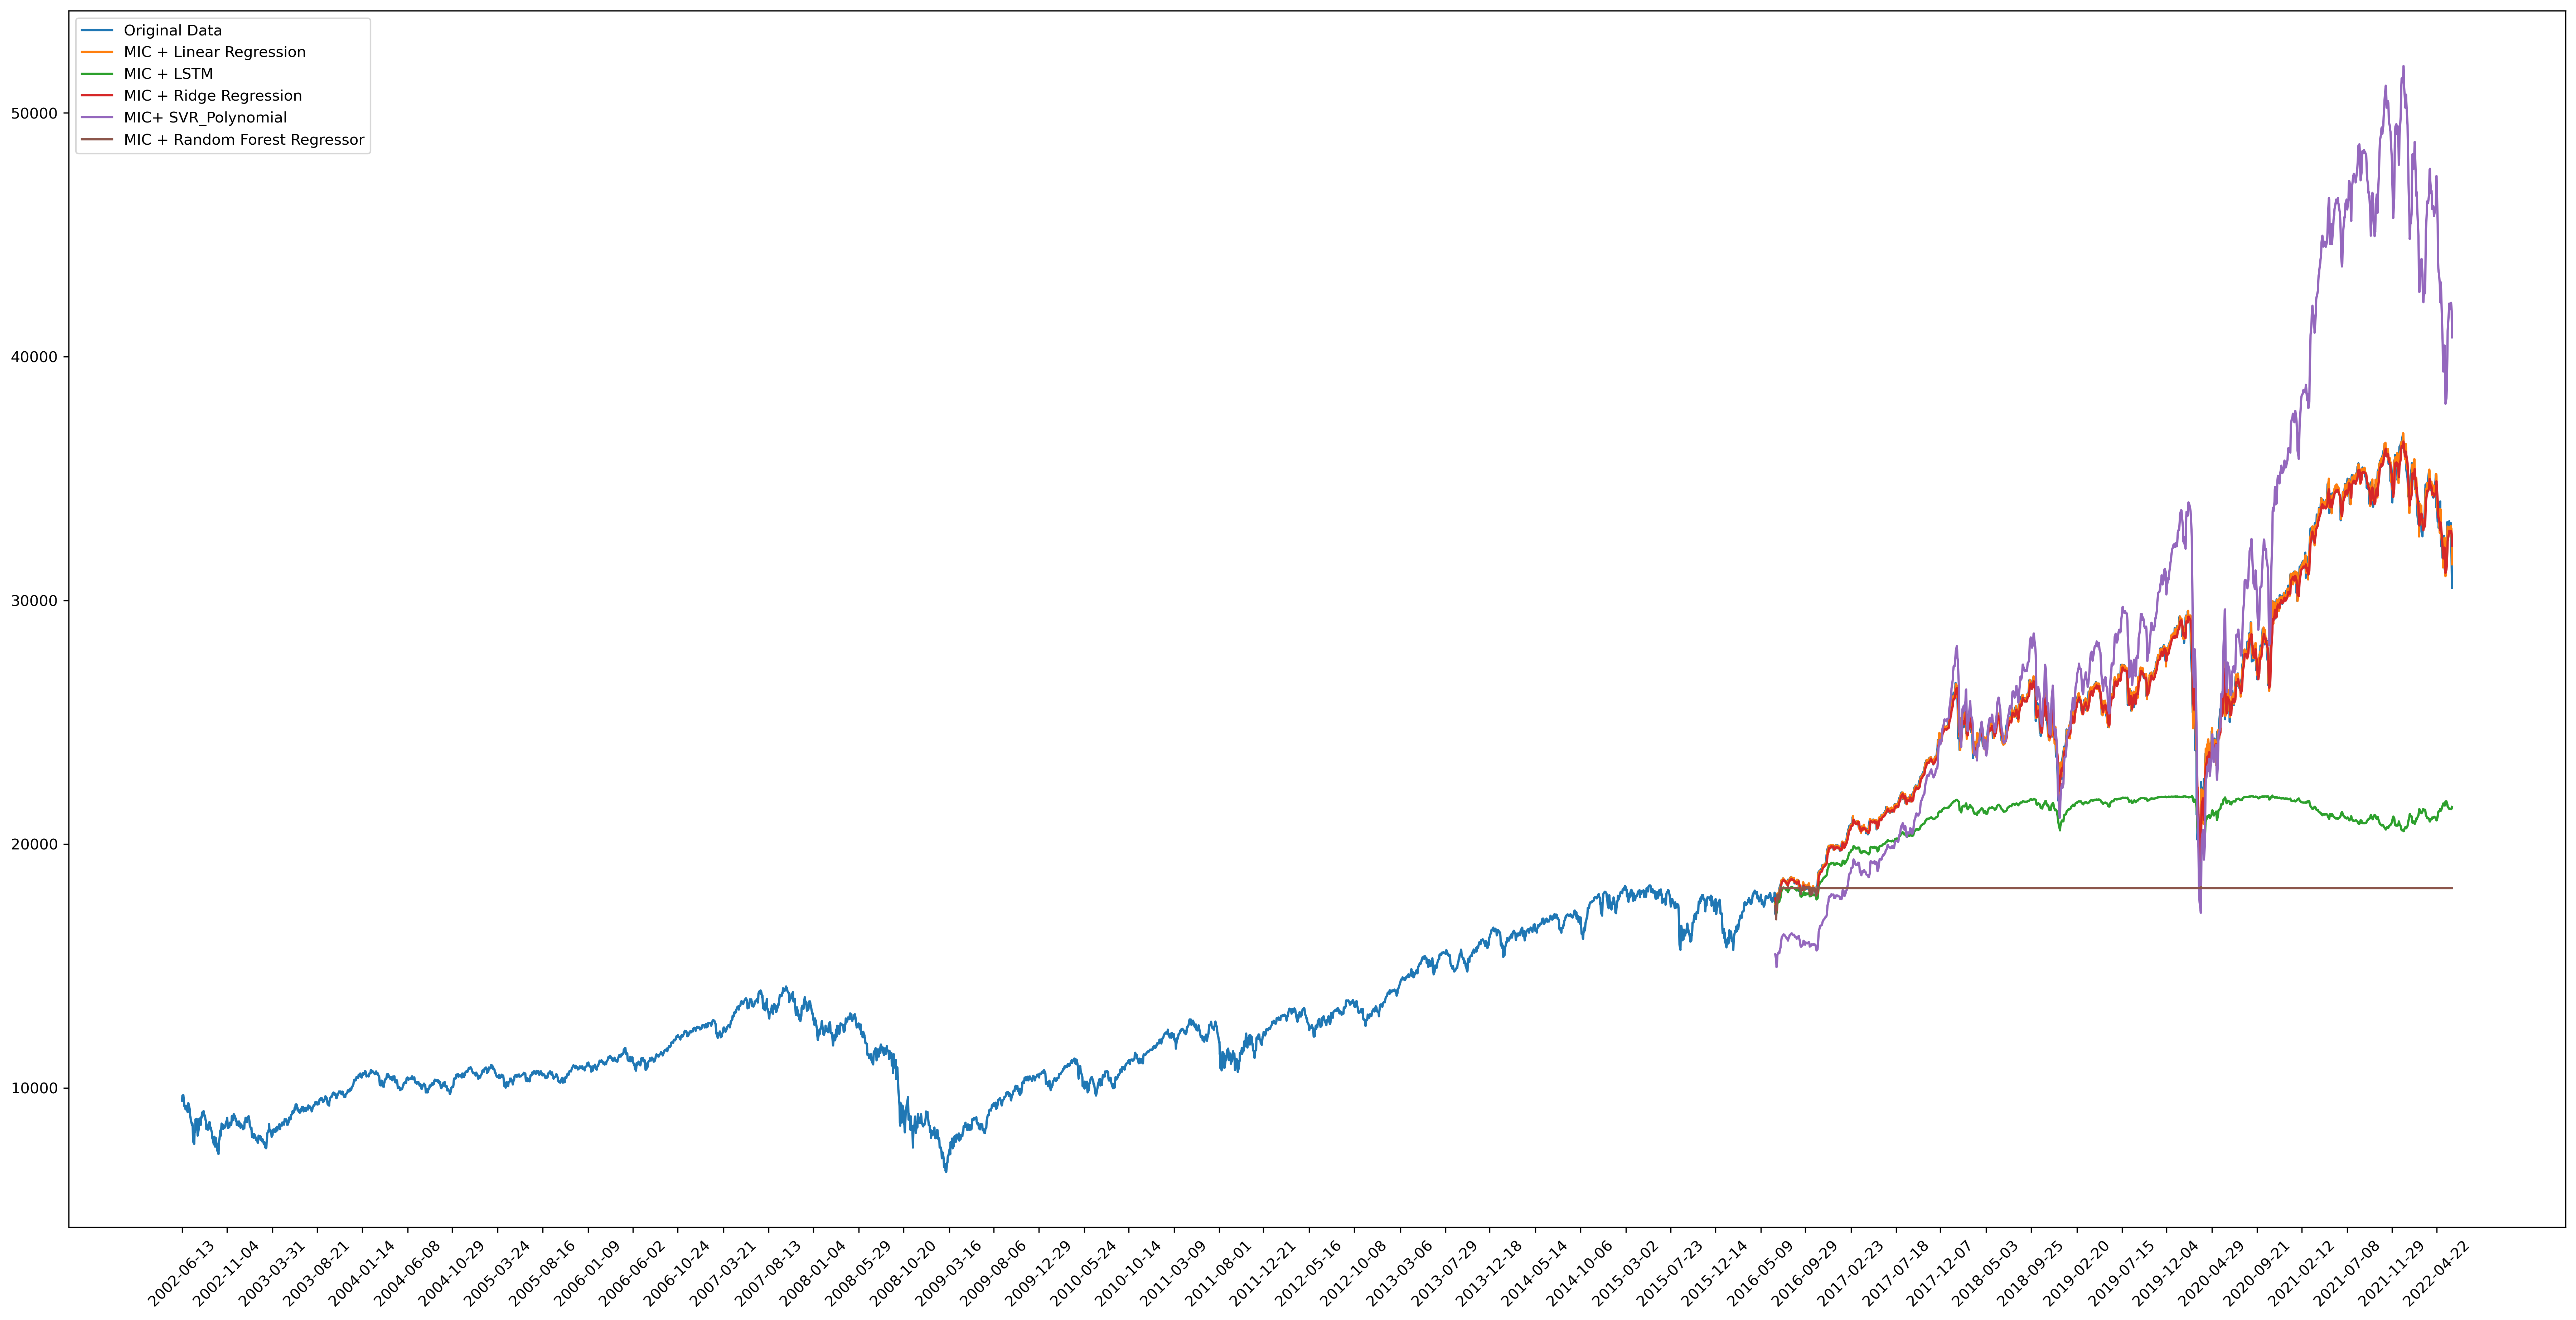

In [193]:
plt.figure(figsize=(30,15),dpi=300)
plt.plot(F['Close_1'], label = "Original Data")
plt.plot(F['MIC_LR'][test_len+30:-1],label = "MIC + Linear Regression")
plt.plot(F['MIC_LSTM'][test_len+30:-1], label = "MIC + LSTM")
plt.plot(F['MIC_Ridge'][test_len+30:-1], label = "MIC + Ridge Regression")
plt.plot(F['MIC_SVR_Poly'][test_len+30:-1], label = "MIC+ SVR_Polynomial")
plt.plot(F['MIC_RandomFRegressor'][test_len+30:-1], label = "MIC + Random Forest Regressor")

plt.xticks(F.index[::100],rotation=45)
plt.legend()
plt.savefig('MIC_on_mutltiple_prediction.svg')
plt.show()

In [194]:
from scipy import stats
import scipy.spatial as ss
from scipy.special import digamma,gamma
import numpy.random as nr
import random
import matplotlib.pyplot as plt
import re
from scipy.stats.stats import pearsonr
import numpy.linalg as la
from numpy.linalg import eig, inv, norm, det
from scipy import stats
from math import log,pi,hypot,fabs,sqrt

In [444]:
F

High  high_lag_1  high_lag_2  high_lag_3  high_lag_4  \
Date                                                                   
2002-06-13   9625.40         NaN         NaN         NaN         NaN   
2002-06-14   9498.92     9625.40         NaN         NaN         NaN   
2002-06-17   9687.77     9498.92     9625.40         NaN         NaN   
2002-06-18   9721.75     9687.77     9498.92     9625.40         NaN   
2002-06-19   9733.39     9721.75     9687.77     9498.92     9625.40   
...              ...         ...         ...         ...         ...   
2022-06-07  33207.45    33235.37    33135.61    33248.61    33272.34   
2022-06-08  33156.50    33207.45    33235.37    33135.61    33248.61   
2022-06-09  32956.73    33156.50    33207.45    33235.37    33135.61   
2022-06-10  32053.52    32956.73    33156.50    33207.45    33235.37   
2022-06-13  31144.91    32053.52    32956.73    33156.50    33207.45   

            high_lag_5  high_lag_6  high_lag_7  high_lag_8  high_lag_9  ...  \
Date                                                                    ...   
2002-06-13         NaN         NaN         NaN         NaN         NaN  ...   
2002-06-14         NaN         NaN         NaN         NaN         NaN  ...   
2002-06-17         NaN         NaN         NaN         NaN         NaN  ...   
2002-06-18         NaN         NaN         NaN         NaN         NaN  ...   
2002-06-19         NaN         NaN         NaN         NaN         NaN  ...   
...                ...         ...         ...         ...         ...  ...   
2022-06-07    33240.22    33213.62    32774.14    32254.44    32014.86  ...   
2022-06-08    33272.34    33240.22    33213.62    32774.14    32254.44  ...   
2022-06-09    33248.61    33272.34    33240.22    33213.62    32774.14  ...   
2022-06-10    33135.61    33248.61    33272.34    33240.22    33213.62  ...   
2022-06-13    33235.37    33135.61    33248.61    33272.34    33240.22  ...   

             vol_lag_22   vol_lag_23   vol_lag_24   vol_lag_25   vol_lag_26  \
Date                                                                          
2002-06-13          NaN          NaN          NaN          NaN          NaN   
2002-06-14          NaN          NaN          NaN          NaN          NaN   
2002-06-17          NaN          NaN          NaN          NaN          NaN   
2002-06-18          NaN          NaN          NaN          NaN          NaN   
2002-06-19          NaN          NaN          NaN          NaN          NaN   
...                 ...          ...          ...          ...          ...   
2022-06-07  507031169.0  479098068.0  425820730.0  516891401.0  552952031.0   
2022-06-08  457941820.0  507031169.0  479098068.0  425820730.0  516891401.0   
2022-06-09  535207901.0  457941820.0  507031169.0  479098068.0  425820730.0   
2022-06-10  493371858.0  535207901.0  457941820.0  507031169.0  479098068.0   
2022-06-13  521732651.0  493371858.0  535207901.0  457941820.0  507031169.0   

             vol_lag_27   vol_lag_28   vol_lag_29   vol_lag_30   Close_1  
Date                                                                      
2002-06-13          NaN          NaN          NaN          NaN   9474.21  
2002-06-14          NaN          NaN          NaN          NaN   9687.42  
2002-06-17          NaN          NaN          NaN          NaN   9706.12  
2002-06-18          NaN          NaN          NaN          NaN   9561.57  
2002-06-19          NaN          NaN          NaN          NaN   9431.77  
...                 ...          ...          ...          ...       ...  
2022-06-07  510766945.0  507356836.0  456006869.0  477810060.0  32910.90  
2022-06-08  552952031.0  510766945.0  507356836.0  456006869.0  32272.79  
2022-06-09  516891401.0  552952031.0  510766945.0  507356836.0  31392.79  
2022-06-10  425820730.0  516891401.0  552952031.0  510766945.0  30516.74  
2022-06-13  479098068.0  425820730.0  516891401.0  552952031.0       NaN  

[5036 rows x 125 columns]

### Calculating MI between each feature X and Y  and sort them by descending

Applying mutual_information_regression

In [200]:
F.shape[1]-6

124

In [201]:
mi_of_features = {}
feature_range = (F.shape[1])-6
for i in range(feature_range):
    nan_arrays = np.array(np.where(np.isnan(F.iloc[:-1,i])))
    if nan_arrays.size == 0:   
        X = np.array(F.iloc[:-1,i]).reshape(-1, 1)
        Y = np.array(F['Close_1'][:-1]).reshape(-1, )
        mi = mutual_info_regression(X,Y)[0]
        mi_of_features[F.columns[i]] = mi
    else:
        start_idx = np.max(nan_arrays[0]) + 1
        X = np.array(F.iloc[start_idx:-1,i]).reshape(-1, 1)
        Y = np.array(F['Close_1'][start_idx:-1]).reshape(-1, )
        mi = mutual_info_regression(X,Y)[0]
        mi_of_features[F.columns[i]] = mi

In [202]:
mi_of_all = pd.Series(mi_of_features)

In [203]:
mi_of_all = mi_of_all.sort_values(ascending=False)

In [204]:
mi_of_all

High          3.451690
Low           3.442005
Open          3.274122
high_lag_1    3.203279
low_lag_1     3.183740
                ...   
vol_lag_16    0.648836
vol_lag_10    0.648784
vol_lag_18    0.647533
vol_lag_12    0.645477
Volume        0.528049
Length: 124, dtype: float64

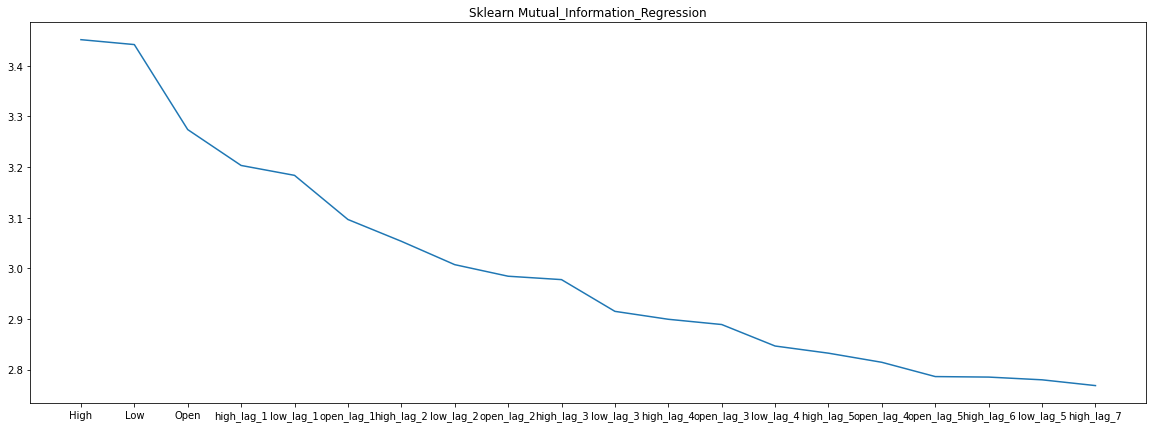

In [205]:
plt.figure(figsize=(20,7))
plt.title('Sklearn Mutual_Information_Regression')
plt.plot(mi_of_all[:20])
plt.savefig("MIR.svg")

### Sort features by mutual information with the target

like High has the highest mutual information score

In [206]:
F_sort = F[mi_of_all.index]
F_sort

High       Low      Open  high_lag_1  low_lag_1  open_lag_1  \
Date                                                                          
2002-06-13   9625.40   9491.86   9612.87         NaN        NaN         NaN   
2002-06-14   9498.92   9260.99   9498.92     9625.40    9491.86     9612.87   
2002-06-17   9687.77   9476.50   9476.50     9498.92    9260.99     9498.92   
2002-06-18   9721.75   9636.96   9684.52     9687.77    9476.50     9476.50   
2002-06-19   9733.39   9542.74   9702.00     9721.75    9636.96     9684.52   
...              ...       ...       ...         ...        ...         ...   
2022-06-07  33207.45  32641.85  32783.03    33235.37   32819.50    33032.04   
2022-06-08  33156.50  32824.37  33087.07    33207.45   32641.85    32783.03   
2022-06-09  32956.73  32267.78  32828.62    33156.50   32824.37    33087.07   
2022-06-10  32053.52  31387.84  32053.52    32956.73   32267.78    32828.62   
2022-06-13  31144.91  30373.72  31144.91    32053.52   31387.84    32053.52   

            high_lag_2  low_lag_2  open_lag_2  high_lag_3  ...   vol_lag_13  \
Date                                                       ...                
2002-06-13         NaN        NaN         NaN         NaN  ...          NaN   
2002-06-14         NaN        NaN         NaN         NaN  ...          NaN   
2002-06-17     9625.40    9491.86     9612.87         NaN  ...          NaN   
2002-06-18     9498.92    9260.99     9498.92     9625.40  ...          NaN   
2002-06-19     9687.77    9476.50     9476.50     9498.92  ...          NaN   
...                ...        ...         ...         ...  ...          ...   
2022-06-07    33135.61   32839.21    32986.32    33248.61  ...  508465869.0   
2022-06-08    33235.37   32819.50    33032.04    33135.61  ...  554268268.0   
2022-06-09    33207.45   32641.85    32783.03    33235.37  ...  551025623.0   
2022-06-10    33156.50   32824.37    33087.07    33207.45  ...  452693827.0   
2022-06-13    32956.73   32267.78    32828.62    33156.50  ...  428527626.0   

             vol_lag_14   vol_lag_20   vol_lag_29   vol_lag_27   vol_lag_16  \
Date                                                                          
2002-06-13          NaN          NaN          NaN          NaN          NaN   
2002-06-14          NaN          NaN          NaN          NaN          NaN   
2002-06-17          NaN          NaN          NaN          NaN          NaN   
2002-06-18          NaN          NaN          NaN          NaN          NaN   
2002-06-19          NaN          NaN          NaN          NaN          NaN   
...                 ...          ...          ...          ...          ...   
2022-06-07  425402921.0  535207901.0  456006869.0  510766945.0  430464201.0   
2022-06-08  508465869.0  493371858.0  507356836.0  552952031.0  373751022.0   
2022-06-09  554268268.0  521732651.0  510766945.0  516891401.0  425402921.0   
2022-06-10  551025623.0  596967045.0  552952031.0  425820730.0  508465869.0   
2022-06-13  452693827.0  430464201.0  516891401.0  479098068.0  554268268.0   

             vol_lag_10   vol_lag_18   vol_lag_12     Volume  
Date                                                          
2002-06-13          NaN          NaN          NaN  227552955  
2002-06-14          NaN          NaN          NaN  287001167  
2002-06-17          NaN          NaN          NaN  247554505  
2002-06-18          NaN          NaN          NaN  212707042  
2002-06-19          NaN          NaN          NaN  248083566  
...                 ...          ...          ...        ...  
2022-06-07  452693827.0  521732651.0  554268268.0  327463783  
2022-06-08  428527626.0  596967045.0  551025623.0  314420559  
2022-06-09  392989139.0  430464201.0  452693827.0  331546530  
2022-06-10  395343889.0  373751022.0  428527626.0  411949075  
2022-06-13  369091013.0  425402921.0  392989139.0  526922052  

[5036 rows x 124 columns]

In [14]:
# calculate <nx> of each feature
def avgdigamma(points,dvec):
#This part finds number of neighbors in some radius in the marginal space
#returns expectation value of <psi(nx)>
    N = len(points)
    tree = ss.cKDTree(points)
    avg = 0.
    for i in range(N):
        dist = dvec[i]
        #subtlety, we don't include the boundary point, 
        #but we are implicitly adding 1 to kraskov def bc center point is included
        num_points = len(tree.query_ball_point(points[i],dist-1e-15,p=float('inf'))) 
        avg += digamma(num_points)/N
    return avg

def mi_Kraskov(features,target, k=3,intens = 1e-10):
    #Merge features and the target into a single dataframe
#     X_x = features
#     Y_y = target
    X = np.vstack((features.T,target.T))
    
    # adding small noise to X, e.g., x<-X+noise
    x = []
    for i in range(len(X)):
        tem = []
        for j in range(len(X[i])):
            #every element becomes list
            #tem = [ [[ X[i][j]+ + intens*nr.rand(1)[0] ],[]...[]] , [[]...[]] , ... , [[]...[]] ]
            tem.append([X[i][j] + intens*nr.rand(1)[0]])
        x.append(tem)
    #Generate tree which amount is equal to the number of features
    points = []
    for j in range(len(x[0])):
        tem = []
        for i in range(len(x)):
            tem.append(x[i][j][0])
        points.append(tem)
    tree = ss.cKDTree(np.array(points))
    
    # every element stores the distance between points
    dvec = []
    for i in range(len(x)):
        dvec.append([])
        
    for point in points:
        # Find k-nearest neighbors in joint space, p=inf means max norm
        knn = tree.query(point, k+1, p=float('inf'))
        points_knn = []
        for i in range(len(x)):
            dvec[i].append(float('-inf'))
            points_knn.append([])
        for j in range(k+1):
            for i in range(len(x)):
                points_knn[i].append(points[knn[1][j]][i])

        # Find distances to k-nearest neighbors in each marginal space
        for i in range(k+1):
                for j in range(len(x)):
                    if dvec[j][-1] < fabs(points_knn[j][i]-points_knn[j][0]):
                        dvec[j][-1] = fabs(points_knn[j][i]-points_knn[j][0])

    ret = 0.
    for i in range(len(x)):
        ret -= avgdigamma(x[i], dvec[i])
    ret += digamma(k) - (float(len(x))-1.)/float(k) + (float(len(x))-1.) * digamma(len(x[0]))
    return ret

In [537]:
my_features = {}
feature_range = (F_sort.shape[1])-1 
for i in range(feature_range):
    nan_arrays = np.array(np.where(np.isnan(F_sort.iloc[:-1,i])))
    if nan_arrays.size == 0:   
        X = np.array(F_sort.iloc[:-1,i]).reshape(-1, 1)
        Y = np.array(F['Close_1'][:-1]).reshape(-1, )
        mi = mutual_info_regression(X,Y)[0]
        my_features[F_sort.columns[i]] = mi
    else:
        start_idx = np.max(nan_arrays[0]) + 1
        X = np.array(F_sort.iloc[start_idx:-1,i]).reshape(-1, 1)
        Y = np.array(F['Close_1'][start_idx:-1]).reshape(-1, )
        mi = mutual_info_regression(X,Y)[0]
        my_features[F_sort.columns[i]] = mi

In [538]:
my_features = pd.Series(my_features)

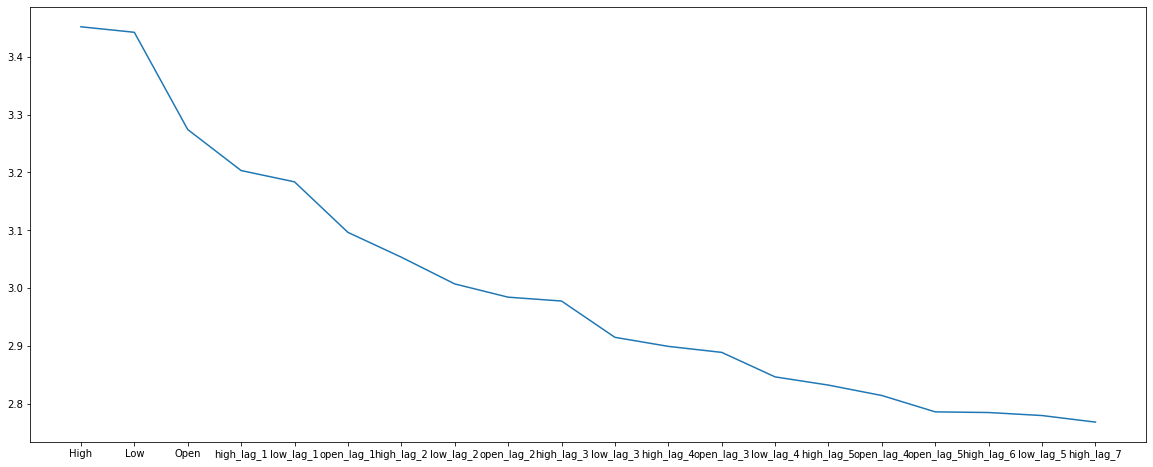

In [545]:
plt.figure(figsize = (20,8))
plt.plot(my_features[:20])

In [602]:
I = {}
col_names = list(F_sort.columns)
for i in range(20):
    I[col_names[i]] = (mi_Kraskov(F_sort.iloc[30:-1,:i],F['Close_1'][30:-1]))

In [603]:
I = pd.Series(I)

Text(0.5, 0, 'feature numbers')

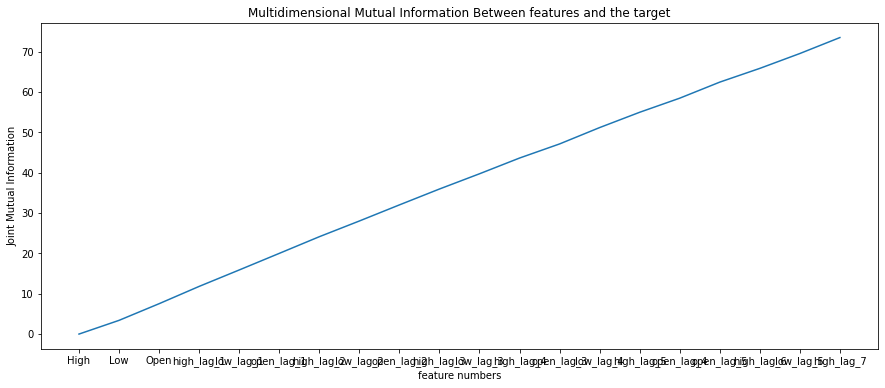

In [604]:
plt.figure(figsize = (15,6))
plt.plot(I)
plt.title("Multidimensional Mutual Information Between features and the target")
plt.ylabel("Joint Mutual Information")
plt.xlabel("feature numbers")

In [16]:
F_kraskov = F.iloc[:-1,:-1].copy()

In [17]:
x = np.array(F_kraskov.iloc[30:,[10,14]])

In [18]:
y = np.array(F['Close_1'][30:-1]).reshape((-1,1))

In [19]:
xy = np.hstack((x,y))

In [22]:
def feature_selection(X, y, metric):
    """
    A function to perform a forward feature selection based on a features to target dependence metric.
    Inputs:
        x: np.ndarray, 2D array of features

        y: np.ndarray,
       
        metric: np.ufunc,
    Output:
        selected: list, the list of selected feature indexes
    """
    selected = [] # indices of selected fetures
    rest = list(range(X.shape[1]))
    prev_score = 0
    # stop = False
    while len(rest)>0:
        id_max = rest[0]
        max_score = 0
        for id in rest:
            nan_arrays = np.array(np.where(np.isnan(X.iloc[:,selected+[id]])))[0]
            print(nan_arrays)
            if nan_arrays.size == 0:  
#                 start_idx = np.max(nan_arrays[0]) + 1
                x = np.array(X.iloc[:,selected+[id]]).reshape((-1, 1))
                Y = np.array(y).reshape((-1,1))
                temp_score = metric(x, Y)
                
            else:
                start_idx = np.max(nan_arrays[0]) + 1
                x = np.array(X.iloc[start_idx:,selected+[id]])
                Y = np.array(y[start_idx:]).reshape((-1,1))
                temp_score = metric(x, Y)
                
            if temp_score>max_score:
                id_max = id
                max_score = temp_score
        if prev_score>max_score:
            return selected
        prev_score = max_score
        selected = selected+[id_max]
        rest.remove(id_max)
        print(rest)
    return selected

In [21]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [ ]:
feature_selection(F_kraskov,F['Close_1'][:-1],mi_Kraskov)

[]
[0]
[0 1]
[0 1 2]
[0 1 2 3]
[0 1 2 3 4]
[0 1 2 3 4 5]
[0 1 2 3 4 5 6]
[0 1 2 3 4 5 6 7]
[0 1 2 3 4 5 6 7 8]


In [652]:
mi_Kraskov(x,y)

5.92178929742002

In [ ]:
feature_selection()

### Algorithm 1

to generate the feature subsets

In [197]:
cols = list(F_sort.columns[:5])
S = []
J_max = {}
J_max[0] = 0
iteration = 0
stop = 0
max_lag = 30

Y = F['Close_1'][max_lag:-1]

while stop!=1 & len(cols)!=0:
    iteration += 1
    # Store the mutual information after adding one more feature
    I_subset = []
    for col in cols:
#         nan_index = np.max(np.where(np.isnan(F_sort[col]))[0])
        for rest in cols[cols.index(col)+1:]:
            feature_subsets = S.copy()
#             col_idx = cols.index(col)
            feature_subsets.append(rest)
            I_subset.append( mi_Kraskov(F_sort[feature_subsets][max_lag:-1],Y) )
#         print(cols[cols.index(col)+1:])  
    J_max[iteration] = (max(I_subset))
    max_mi_index = I_subset.index(max(I_subset))
    
    if J_max[iteration] < J_max[iteration - 1]:
        # stop until no more feature will improve the mutual information score
        stop = 1
    else:
        # Update feature_subsets which contian the column name(feature name)
        S.append(cols[max_mi_index])
        # Delete column from the original feature matrix
        cols.remove(cols[max_mi_index])
        print(cols)

['Low', 'Open', 'high_lag_1', 'low_lag_1']


In [198]:
J_max

{0: 0, 1: 3.3509980497330423}

In [193]:
S

['High']

In [129]:
n_neighbors = 3
feature_numbers = x.shape[1]
xy = np.hstack((x, y))

# Here we rely on NearestNeighbors to select the fastest algorithm.
nn = NearestNeighbors(metric="chebyshev", n_neighbors=n_neighbors)

nn.fit(xy)
radius = nn.kneighbors()[0]
radius = np.nextafter(radius[:, -1], 0)

    # KDTree is explicitly fit to allow for the querying of number of
    # neighbors within a specified radius
kd = KDTree(x, metric="chebyshev")
nx = kd.query_radius(x, radius, count_only=True, return_distance=False)
nx = np.array(nx) - 1.0

kd = KDTree(y, metric="chebyshev")
ny = kd.query_radius(y, radius, count_only=True, return_distance=False)
ny = np.array(ny) - 1.0

mi = (
    digamma(n_neighbors)-(feature_numbers-1.0)*((1.0/n_neighbors)- digamma(len(ny)))- np.mean(digamma(np.sum(nx)) + digamma(ny))
    )
# 10.870841711022253 3 cols
# 19.061324335175108 4 cols

mi

68.1986536231888

In [208]:
from sklearn.feature_selection import mutual_info_regression as MIR

In [1173]:
from mlxtend.feature_selection import SequentialFeatureSelector

Accumulative Mutual information

In [1087]:
y_test = np.array(dj1['Close_1'][1:-1])
x_test = np.array(high_lag.iloc[1:-1,:2]).reshape((-1,2))

In [1088]:
MIR(x_test,y_test)

array([3.45163719, 3.20322228])

In [1089]:
mi_scores_high[:2]

[array([3.45153237]), array([3.20322508])]

In [967]:
len(dj1['Close_1'][1:-1])

5034

In [209]:
mi_scores_high = []
for i in range(0,31):
    mi_score = 0.0
    if i == 0:
        y_test = np.array(dj1['Close_1'][1:-1])
        x_test = np.array(high_lag['High'][1:-1]).reshape((-1,1))
        mi_score = MIR(x_test,y_test)
    else:
        y_test = np.array(dj1['Close_1'][i:-1])
        x_test = np.array(high_lag['high_lag_'+str(i)][i:-1]).reshape((-1,1))
        mi_score = MIR(x_test,y_test)
    mi_scores_high.append(mi_score)

mi_scores_open = []
for i in range(0,31):
    mi_score = 0.0
    if i == 0:
        y_test = np.array(dj1['Close_1'][1:-1])
        x_test = np.array(open_lag['Open'][1:-1]).reshape((-1,1))
        mi_score = MIR(x_test,y_test)
    else:
        y_test = np.array(dj1['Close_1'][i:-1])
        x_test = np.array(open_lag['open_lag_'+str(i)][i:-1]).reshape((-1,1))
        mi_score = MIR(x_test,y_test)
    mi_scores_open.append(mi_score)
                 
mi_scores_low = []
for i in range(0,31):
    mi_score = 0.0
    if i == 0:
        y_test = np.array(dj1['Close_1'][1:-1])
        x_test = np.array(low_lag['Low'][1:-1]).reshape((-1,1))
        mi_score = MIR(x_test,y_test)
    else:
        y_test = np.array(dj1['Close_1'][i:-1])
        x_test = np.array(low_lag['low_lag_'+str(i)][i:-1]).reshape((-1,1))
        mi_score = MIR(x_test,y_test)
    mi_scores_low.append(mi_score)    

mi_scores_vol = []
for i in range(0,31):
    mi_score = 0.0
    if i == 0:
        y_test = np.array(dj1['Close_1'][1:-1])
        x_test = np.array(vol_lag['Volume'][1:-1]).reshape((-1,1))
        mi_score = MIR(x_test,y_test)
    else:
        y_test = np.array(dj1['Close_1'][i:-1])
        x_test = np.array(vol_lag['vol_lag_'+str(i)][i:-1]).reshape((-1,1))
        mi_score = MIR(x_test,y_test)
    mi_scores_vol.append(mi_score)

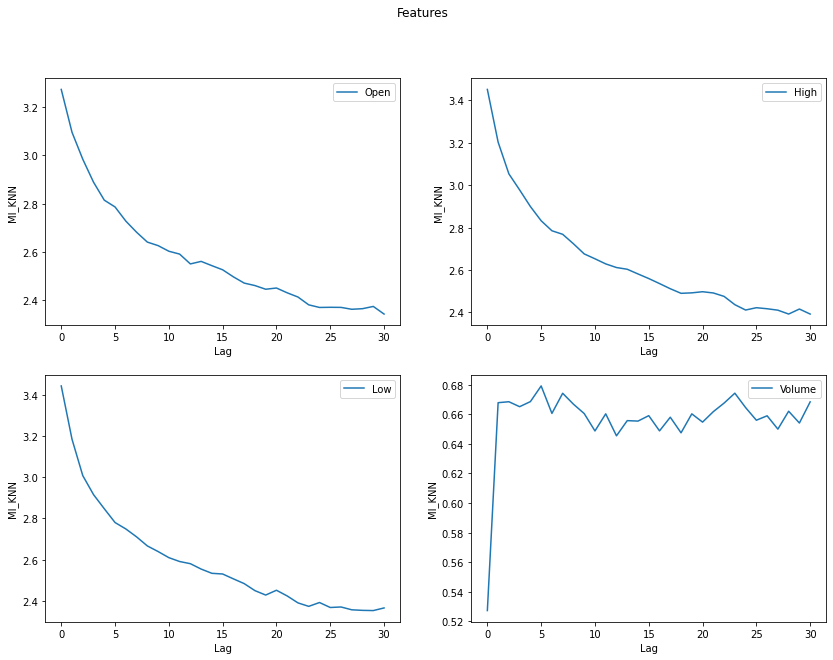

In [210]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
plt.plot(range(0,31),mi_scores_open,label='Open')
plt.ylabel('MI_KNN')
plt.xlabel('Lag')
plt.legend()
plt.subplot(2,2,2)
plt.plot(range(0,31),mi_scores_high,label='High')
plt.ylabel('MI_KNN')
plt.xlabel('Lag')
plt.legend()
plt.subplot(2,2,3)
plt.plot(range(0,31),mi_scores_low,label='Low')
plt.ylabel('MI_KNN')
plt.xlabel('Lag')
plt.legend()
plt.subplot(2,2,4)
plt.plot(range(0,31),mi_scores_vol,label='Volume')
plt.ylabel('MI_KNN')
plt.xlabel('Lag')
plt.legend()

plt.suptitle('Features')
plt.show()

In [211]:
print('High ',mi_scores_high.index(max(mi_scores_high)))    
print('Open ',mi_scores_open.index(max(mi_scores_open)))    
print('Low ',mi_scores_low.index(max(mi_scores_low)))    
print('Volume ',mi_scores_vol.index(max(mi_scores_vol)))    

High  0
Open  0
Low  0
Volume  5


In [155]:
import math
from collections import Counter

In [270]:
x = open_lag['open_lag_2'].dropna()
y = dj1['Close'][2:]

In [255]:
from sklearn import metrics

In [276]:
from sklearn.feature_selection import mutual_info_regression as MIR

using volume(t)...(t-5)+high+low+open

In [1129]:
dj5 = new_dj1 = pd.DataFrame({
    'High(t)':dj1['High'],
    'Low(t)':dj1['Low'],
    'Open(t)':dj1['Open'],
    'Volume(t-5)':vol_lag['vol_lag_5'],
    'Volume(t-4)':vol_lag['vol_lag_4'],
    'Volume(t-3)':vol_lag['vol_lag_3'],
    'Volume(t-2)':vol_lag['vol_lag_2'],
    'Volume(t-1)':vol_lag['vol_lag_1'],
    'Volume(t)':dj1['Volume'],
    'Close(t+1)':dj1['Close_1'],
    'Close(t)':dj1['Close']
})

In [1130]:
dj5

High(t)    Low(t)   Open(t)  Volume(t-5)  Volume(t-4)  \
Date                                                                 
2002-06-13   9625.40   9491.86   9612.87          NaN          NaN   
2002-06-14   9498.92   9260.99   9498.92          NaN          NaN   
2002-06-17   9687.77   9476.50   9476.50          NaN          NaN   
2002-06-18   9721.75   9636.96   9684.52          NaN          NaN   
2002-06-19   9733.39   9542.74   9702.00          NaN  227552955.0   
...              ...       ...       ...          ...          ...   
2022-06-07  33207.45  32641.85  32783.03  640857432.0  344779544.0   
2022-06-08  33156.50  32824.37  33087.07  344779544.0  350437139.0   
2022-06-09  32956.73  32267.78  32828.62  350437139.0  327416082.0   
2022-06-10  32053.52  31387.84  32053.52  327416082.0  289294618.0   
2022-06-13  31144.91  30373.72  31144.91  289294618.0  327463783.0   

            Volume(t-3)  Volume(t-2)  Volume(t-1)  Volume(t)  Close(t+1)  \
Date                                                                       
2002-06-13          NaN          NaN          NaN  227552955     9474.21   
2002-06-14          NaN          NaN  227552955.0  287001167     9687.42   
2002-06-17          NaN  227552955.0  287001167.0  247554505     9706.12   
2002-06-18  227552955.0  287001167.0  247554505.0  212707042     9561.57   
2002-06-19  287001167.0  247554505.0  212707042.0  248083566     9431.77   
...                 ...          ...          ...        ...         ...   
2022-06-07  350437139.0  327416082.0  289294618.0  327463783    32910.90   
2022-06-08  327416082.0  289294618.0  327463783.0  314420559    32272.79   
2022-06-09  289294618.0  327463783.0  314420559.0  331546530    31392.79   
2022-06-10  327463783.0  314420559.0  331546530.0  411949075    30516.74   
2022-06-13  314420559.0  331546530.0  411949075.0  526922052         NaN   

            Close(t)  
Date                  
2002-06-13   9502.80  
2002-06-14   9474.21  
2002-06-17   9687.42  
2002-06-18   9706.12  
2002-06-19   9561.57  
...              ...  
2022-06-07  33180.14  
2022-06-08  32910.90  
2022-06-09  32272.79  
2022-06-10  31392.79  
2022-06-13  30516.74  

[5036 rows x 11 columns]

to predict close(t+1),we use high(t) ,low(t),open_price(t),volume(t-5)...volume(t)

In [1135]:
dj5_copy = dj5.iloc[5:-1,:]
SCX = MinMaxScaler(feature_range=(0,1))
SCY = MinMaxScaler(feature_range=(0,1))
scl_X = SCX.fit_transform(dj5_copy.iloc[:,:9])
scl_Y = SCY.fit_transform(pd.DataFrame(dj5_copy['Close(t+1)']))

In [1137]:
x_5 = np.reshape(scl_X, (scl_X.shape[0], scl_X.shape[1], 1))
y_5 = scl_Y.reshape((-1,1))
test_len = int(len(x)*0.7)
X_train_5 = x_5[:test_len]
X_test_5 = x_5[test_len:]
y_train_5 = y_5[:test_len]
y_test_5 = y_5[test_len:]

In [1138]:
mi_5 = Sequential()
mi_5.add(LSTM(50,return_sequences = True))
# 添加 Dropout 隐藏层 防止过拟合
mi_5.add(Dropout(0.2))

# 添加 含有 30 个单元的 LSTM 网络(第二层)
mi_5.add(LSTM(30,return_sequences = True))
# 添加 Dropout 隐藏层 防止过拟合
mi_5.add(Dropout(0.2))

# 添加 含有 10 个单元的 LSTM 网络(第三层)
# 注意，最后一层没有 return_sequences = True ！！！
mi_5.add(LSTM(10))
# 添加 Dropout 隐藏层 防|止过拟合
mi_5.add(Dropout(0.2))

# 添加输出层网络以输出预测的股票收盘价格
mi_5.add(Dense(1))

In [1143]:
X_test_5.shape

(1509, 9, 1)

In [1139]:
mi_5.compile(optimizer='adam', loss='mean_squared_error')
mi_5.fit(X_train_5, y_train_5, batch_size=32, epochs=100)

Epoch 1/100
111/111 [==============================] - 11s 12ms/step - loss: 0.0065
Epoch 2/100
111/111 [==============================] - 1s 12ms/step - loss: 0.0016
Epoch 3/100
111/111 [==============================] - 1s 12ms/step - loss: 0.0012
Epoch 4/100
111/111 [==============================] - 1s 13ms/step - loss: 9.5218e-04
Epoch 5/100
111/111 [==============================] - 1s 13ms/step - loss: 8.4934e-04
Epoch 6/100
111/111 [==============================] - 1s 12ms/step - loss: 6.9084e-04
Epoch 7/100
111/111 [==============================] - 1s 12ms/step - loss: 5.8329e-04
Epoch 8/100
111/111 [==============================] - 1s 13ms/step - loss: 5.8190e-04
Epoch 9/100
111/111 [==============================] - 1s 12ms/step - loss: 4.1645e-04
Epoch 10/100
111/111 [==============================] - 1s 11ms/step - loss: 4.1649e-04
Epoch 11/100
111/111 [==============================] - 1s 12ms/step - loss: 3.8551e-04
Epoch 12/100
111/111 [==============================

In [1141]:
y_pred_5 = mi_5.predict(X_test_5)
mean_absolute_error(y_test_5, y_pred_5)

0.33249776321970453

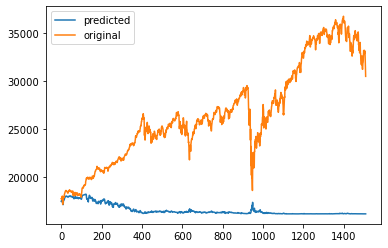

In [1152]:
plt.plot(SCY.inverse_transform(y_pred_5),label='predicted')
plt.plot(SCY.inverse_transform(y_test_5),label='original')
plt.legend()
plt.show()

In [983]:
new_dj1 = pd.DataFrame({
    'High(t)':dj1['High'],
    'Low(t)':dj1['Low'],
    'Open(t)':dj1['Open'],
    'Volume(t-5)':vol_lag['vol_lag_5'],
    'Volume(t)':dj1['Volume'],
    'Close(t+1)':dj1['Close_1'],
    'Close(t)':dj1['Close']
})

In [1091]:
new_dj1.corr()

High(t)    Low(t)   Open(t)  Volume(t-5)  Volume(t)  Close(t+1)  \
High(t)      1.000000  0.999794  0.999897     0.409010   0.411531    0.991495   
Low(t)       0.999794  1.000000  0.999845     0.402746   0.402030    0.991109   
Open(t)      0.999897  0.999845  1.000000     0.405768   0.407953    0.991283   
Volume(t-5)  0.409010  0.402746  0.405768     1.000000   0.715281    0.457567   
Volume(t)    0.411531  0.402030  0.407953     0.715281   1.000000    0.458063   
Close(t+1)   0.991495  0.991109  0.991283     0.457567   0.458063    1.000000   
Close(t)     0.999866  0.999879  0.999751     0.406095   0.406272    0.991301   

             Close(t)  
High(t)      0.999866  
Low(t)       0.999879  
Open(t)      0.999751  
Volume(t-5)  0.406095  
Volume(t)    0.406272  
Close(t+1)   0.991301  
Close(t)     1.000000

Text(0.5, 1.0, 'Correlation Heatmap')

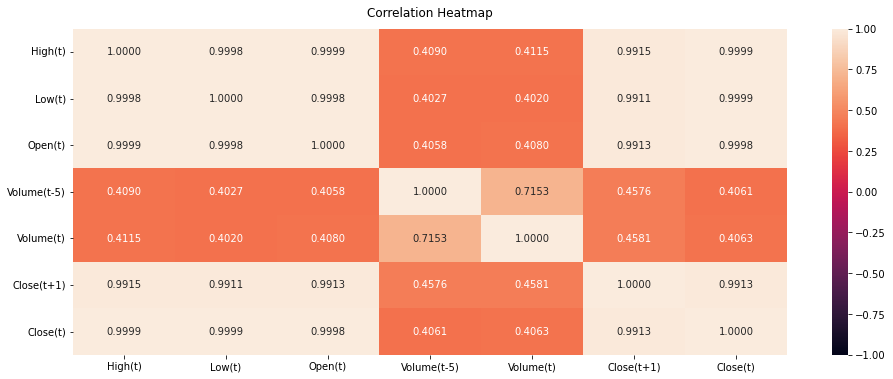

In [1103]:
import seaborn as sns
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(new_dj1.corr(), vmin=-1, vmax=1,fmt=".4f", annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [984]:
new_dj1

High(t)    Low(t)   Open(t)  Volume(t-5)  Volume(t)  Close(t+1)  \
Date                                                                           
2002-06-13   9625.40   9491.86   9612.87          NaN  227552955     9474.21   
2002-06-14   9498.92   9260.99   9498.92          NaN  287001167     9687.42   
2002-06-17   9687.77   9476.50   9476.50          NaN  247554505     9706.12   
2002-06-18   9721.75   9636.96   9684.52          NaN  212707042     9561.57   
2002-06-19   9733.39   9542.74   9702.00          NaN  248083566     9431.77   
...              ...       ...       ...          ...        ...         ...   
2022-06-07  33207.45  32641.85  32783.03  640857432.0  327463783    32910.90   
2022-06-08  33156.50  32824.37  33087.07  344779544.0  314420559    32272.79   
2022-06-09  32956.73  32267.78  32828.62  350437139.0  331546530    31392.79   
2022-06-10  32053.52  31387.84  32053.52  327416082.0  411949075    30516.74   
2022-06-13  31144.91  30373.72  31144.91  289294618.0  526922052         NaN   

            Close(t)  
Date                  
2002-06-13   9502.80  
2002-06-14   9474.21  
2002-06-17   9687.42  
2002-06-18   9706.12  
2002-06-19   9561.57  
...              ...  
2022-06-07  33180.14  
2022-06-08  32910.90  
2022-06-09  32272.79  
2022-06-10  31392.79  
2022-06-13  30516.74  

[5036 rows x 7 columns]

In [1027]:
dataset = new_dj1.iloc[5:-1,:]

In [987]:
x_sc = MinMaxScaler(feature_range=(0,1))
y_sc = MinMaxScaler(feature_range=(0,1))
scaled_x = x_sc.fit_transform(dataset.iloc[:,:4])
scaled_y = y_sc.fit_transform(pd.DataFrame(dataset.iloc[:,5]))

In [861]:
from sklearn.preprocessing import MinMaxScaler

In [862]:
from sklearn.model_selection import train_test_split

In [989]:
x = np.reshape(scaled_x, (scaled_x.shape[0], scaled_x.shape[1], 1))
y = scaled_y.reshape((-1,1))
test_len = int(len(x)*0.7)
X_train = x[:test_len]
X_test = x[test_len:]
y_train = y[:test_len]
y_test = y[test_len:]
# X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [1007]:
len(y_test)

1509

In [990]:
y_train.shape

(3521, 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,Input,optimizers
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout

In [992]:
mi_lstm = Sequential()
mi_lstm.add(LSTM(50,return_sequences = True))
# 添加 Dropout 隐藏层 防止过拟合
mi_lstm.add(Dropout(0.2))

# 添加 含有 30 个单元的 LSTM 网络(第二层)
mi_lstm.add(LSTM(30,return_sequences = True))
# 添加 Dropout 隐藏层 防止过拟合
mi_lstm.add(Dropout(0.2))

# 添加 含有 10 个单元的 LSTM 网络(第三层)
# 注意，最后一层没有 return_sequences = True ！！！
mi_lstm.add(LSTM(10))
# 添加 Dropout 隐藏层 防|止过拟合
mi_lstm.add(Dropout(0.2))

# 添加输出层网络以输出预测的股票收盘价格
mi_lstm.add(Dense(1))

In [993]:
mi_lstm.compile(optimizer='adam', loss='mean_squared_error')

In [994]:
mi_lstm.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
111/111 [==============================] - 12s 21ms/step - loss: 0.0087
Epoch 2/100
111/111 [==============================] - 2s 17ms/step - loss: 0.0015: 0s
Epoch 3/100
111/111 [==============================] - 2s 18ms/step - loss: 0.0010
Epoch 4/100
111/111 [==============================] - 2s 19ms/step - loss: 8.6011e-04
Epoch 5/100
111/111 [==============================] - 2s 20ms/step - loss: 6.9403e-04
Epoch 6/100
111/111 [==============================] - 2s 15ms/step - loss: 6.4493e-04
Epoch 7/100
111/111 [==============================] - 2s 16ms/step - loss: 5.1159e-04:
Epoch 8/100
111/111 [==============================] - 2s 14ms/step - loss: 5.3639e-04
Epoch 9/100
111/111 [==============================] - 2s 14ms/step - loss: 4.5824e-04
Epoch 10/100
111/111 [==============================] - 2s 15ms/step - loss: 4.1862e-04
Epoch 11/100
111/111 [==============================] - 2s 16ms/step - loss: 3.9408e-04
Epoch 12/100
111/111 [=========================

111/111 [==============================] - 2s 15ms/step - loss: 2.8494e-04
Epoch 95/100
111/111 [==============================] - 2s 16ms/step - loss: 3.0767e-04
Epoch 96/100
111/111 [==============================] - 2s 15ms/step - loss: 3.0106e-04
Epoch 97/100
111/111 [==============================] - 2s 14ms/step - loss: 2.9377e-04
Epoch 98/100
111/111 [==============================] - 2s 14ms/step - loss: 3.0049e-04
Epoch 99/100
111/111 [==============================] - 1s 12ms/step - loss: 2.9475e-04
Epoch 100/100
111/111 [==============================] - 1s 13ms/step - loss: 3.0111e-04


In [995]:
mi_lstm.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_59 (LSTM)              (None, 4, 50)             10400     
                                                                 
 dropout_27 (Dropout)        (None, 4, 50)             0         
                                                                 
 lstm_60 (LSTM)              (None, 4, 30)             9720      
                                                                 
 dropout_28 (Dropout)        (None, 4, 30)             0         
                                                                 
 lstm_61 (LSTM)              (None, 10)                1640      
                                                                 
 dropout_29 (Dropout)        (None, 10)                0         
                                                                 
 dense_29 (Dense)            (None, 1)               

In [996]:
mi_pred = model.predict(X_test)

In [997]:
from sklearn.metrics import mean_absolute_error

In [998]:
mi_pred = y_sc.inverse_transform(mi_pred)

In [999]:
y_actual = y_sc.inverse_transform(y_test)

In [1000]:
MAE = mean_absolute_error(y_test, mi_lstm.predict(X_test))
MAE

0.17042605161398922

In [1064]:
from sklearn.metrics import r2_score
R2_MI = r2_score(y_test,mi_lstm.predict(X_test))
R2_MI

-0.6588697286253626

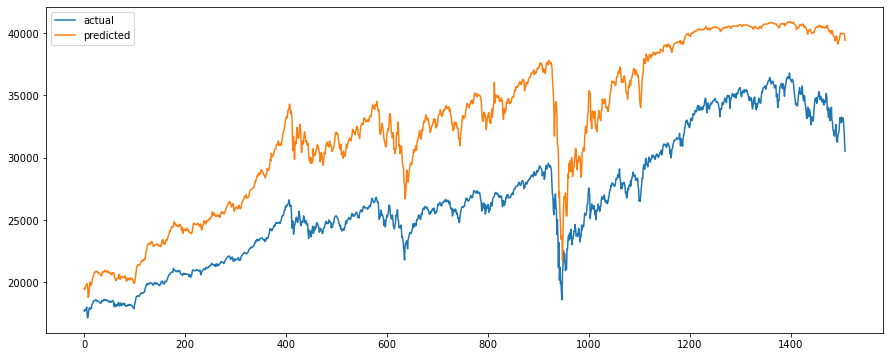

The Mean Absolute Error is: 0.17042605161398922


In [1003]:
plt.figure(figsize=(15,6))
plt.plot(y_actual, label = "actual")
plt.plot(mi_pred, label = "predicted")
plt.legend()
plt.show()
print('The Mean Absolute Error is: {}'.format(MAE))

In [1021]:
mi_pred

array([[19512.133],
       [19414.932],
       [19486.07 ],
       ...,
       [39956.656],
       [39833.72 ],
       [39425.71 ]], dtype=float32)

In [1033]:
len(dataset.iloc[test_len:,:])

1509

In [1035]:
len(mi_pred)

1509

In [1036]:
dataset.loc[test_len:,'MI_Close(t+1)'] = mi_pred

C:\Users\rich\anaconda3\lib\site-packages\pandas\core\indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)
C:\Users\rich\anaconda3\lib\site-packages\pandas\core\indexing.py:1678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = empty_value


#### No feature Selection

In [1041]:
dj1

Open      High       Low     Close     Volume   Close_1
Date                                                                   
2002-06-13   9612.87   9625.40   9491.86   9502.80  227552955   9474.21
2002-06-14   9498.92   9498.92   9260.99   9474.21  287001167   9687.42
2002-06-17   9476.50   9687.77   9476.50   9687.42  247554505   9706.12
2002-06-18   9684.52   9721.75   9636.96   9706.12  212707042   9561.57
2002-06-19   9702.00   9733.39   9542.74   9561.57  248083566   9431.77
...              ...       ...       ...       ...        ...       ...
2022-06-07  32783.03  33207.45  32641.85  33180.14  327463783  32910.90
2022-06-08  33087.07  33156.50  32824.37  32910.90  314420559  32272.79
2022-06-09  32828.62  32956.73  32267.78  32272.79  331546530  31392.79
2022-06-10  32053.52  32053.52  31387.84  31392.79  411949075  30516.74
2022-06-13  31144.91  31144.91  30373.72  30516.74  526922052       NaN

[5036 rows x 6 columns]

In [1043]:
X_no_feature = dj1[['High','Low','Open','Volume']].iloc[:-1,:]
Y_no_feature = pd.DataFrame((dj1['Close_1'])[:-1])
test_index = int(len(dataset)*0.7)

In [1044]:
scaled_X = x_sc.fit_transform(X_no_feature)
scaled_Y = y_sc.fit_transform(pd.DataFrame(Y_no_feature))

In [1045]:
X_original = np.reshape(scaled_X, (scaled_X.shape[0], scaled_X.shape[1], 1))
Y_original = scaled_Y.reshape((-1,1))

In [1046]:
train_x_original = X_original[:test_index]
train_y_original = Y_original[:test_index]
test_x_original = X_original[test_index:]
test_y_original = Y_original[test_index:]

In [1047]:
lstm = Sequential()
lstm.add(LSTM(50,return_sequences = True))
# 添加 Dropout 隐藏层 防止过拟合
lstm.add(Dropout(0.2))

# 添加 含有 30 个单元的 LSTM 网络(第二层)
lstm.add(LSTM(30,return_sequences = True))
# 添加 Dropout 隐藏层 防止过拟合
lstm.add(Dropout(0.2))

# 添加 含有 10 个单元的 LSTM 网络(第三层)
# 注意，最后一层没有 return_sequences = True ！！！
lstm.add(LSTM(10))
# 添加 Dropout 隐藏层 防|止过拟合
lstm.add(Dropout(0.2))

# 添加输出层网络以输出预测的股票收盘价格
lstm.add(Dense(1))

lstm.compile(optimizer='adam', loss='mean_squared_error')

In [1048]:
lstm.fit(train_x_original, train_y_original, batch_size=32, epochs=100)

Epoch 1/100
111/111 [==============================] - 8s 7ms/step - loss: 0.0078
Epoch 2/100
111/111 [==============================] - 1s 7ms/step - loss: 0.0012
Epoch 3/100
111/111 [==============================] - 1s 8ms/step - loss: 9.9750e-04
Epoch 4/100
111/111 [==============================] - 1s 7ms/step - loss: 8.1750e-04
Epoch 5/100
111/111 [==============================] - 1s 9ms/step - loss: 7.4102e-04
Epoch 6/100
111/111 [==============================] - 1s 7ms/step - loss: 6.3937e-04
Epoch 7/100
111/111 [==============================] - 1s 7ms/step - loss: 5.7969e-04
Epoch 8/100
111/111 [==============================] - 1s 7ms/step - loss: 5.0963e-04
Epoch 9/100
111/111 [==============================] - 1s 7ms/step - loss: 4.6990e-04
Epoch 10/100
111/111 [==============================] - 1s 7ms/step - loss: 3.9983e-04
Epoch 11/100
111/111 [==============================] - 1s 7ms/step - loss: 3.9282e-04
Epoch 12/100
111/111 [==============================] - 1s 7

In [1072]:
y_pred = y_sc.inverse_transform(lstm.predict(test_x_original))

In [1073]:
r2_score(test_y_original,lstm.predict(test_x_original))

-2.6803056940928798

In [1074]:
MAE_lstm = mean_absolute_error(test_y_original, lstm.predict(test_x_original))

In [1075]:
MAE_lstm

0.26242179610782335

In [1076]:
dj1_no = dj1.iloc[test_index :-1,:].copy()
dj1_no['Close(t+1)'] = y_pred
dj1_no

Open      High       Low     Close     Volume   Close_1  \
Date                                                                      
2016-06-08  17931.91  18016.00  17931.91  18005.05   71269426  17985.19   
2016-06-09  17969.98  18005.22  17915.88  17985.19   69697361  17865.34   
2016-06-10  17938.82  17938.82  17812.34  17865.34   90531118  17732.48   
2016-06-13  17830.50  17893.28  17731.35  17732.48  101606847  17674.82   
2016-06-14  17710.77  17733.92  17595.79  17674.82   93730659  17640.17   
...              ...       ...       ...       ...        ...       ...   
2022-06-06  33032.04  33235.37  32819.50  32915.78  289294618  33180.14   
2022-06-07  32783.03  33207.45  32641.85  33180.14  327463783  32910.90   
2022-06-08  33087.07  33156.50  32824.37  32910.90  314420559  32272.79   
2022-06-09  32828.62  32956.73  32267.78  32272.79  331546530  31392.79   
2022-06-10  32053.52  32053.52  31387.84  31392.79  411949075  30516.74   

              Close(t+1)  
Date                      
2016-06-08  17506.113281  
2016-06-09  17501.640625  
2016-06-10  17456.113281  
2016-06-13  17410.060547  
2016-06-14  17291.871094  
...                  ...  
2022-06-06  17477.613281  
2022-06-07  17495.753906  
2022-06-08  17472.976562  
2022-06-09  17546.175781  
2022-06-10  17725.816406  

[1514 rows x 7 columns]

In [1077]:
dataset

High(t)    Low(t)   Open(t)  Volume(t-5)  Volume(t)  \
Date                                                               
2002-06-20   9573.89   9425.88   9561.64  227552955.0  276960842   
2002-06-21   9430.66   9220.63   9430.66  287001167.0  416432368   
2002-06-24   9369.95   9083.56   9252.47  247554505.0  341228701   
2002-06-25   9413.08   9111.25   9285.56  212707042.0  295015367   
2002-06-26   9160.81   8926.57   9108.22  248083566.0  407442095   
...              ...       ...       ...          ...        ...   
2022-06-06  33235.37  32819.50  33032.04  369091013.0  289294618   
2022-06-07  33207.45  32641.85  32783.03  640857432.0  327463783   
2022-06-08  33156.50  32824.37  33087.07  344779544.0  314420559   
2022-06-09  32956.73  32267.78  32828.62  350437139.0  331546530   
2022-06-10  32053.52  31387.84  32053.52  327416082.0  411949075   

              Close(t+1)  Close(t)  MI_Close(t+1)  
Date                                               
2002-06-20   9253.790000   9431.77            NaN  
2002-06-21   9281.820000   9253.79            NaN  
2002-06-24   9126.820000   9281.82            NaN  
2002-06-25   9120.110000   9126.82            NaN  
2002-06-26   9269.920000   9120.11            NaN  
...                  ...       ...            ...  
2022-06-06  39974.734375  32915.78   39974.734375  
2022-06-07  39968.035156  33180.14   39968.035156  
2022-06-08  39956.656250  32910.90   39956.656250  
2022-06-09  39833.718750  32272.79   39833.718750  
2022-06-10  39425.710938  31392.79   39425.710938  

[5030 rows x 8 columns]

In [1058]:
dj1_no

Open      High       Low     Close     Volume   Close_1  \
Date                                                                      
2016-06-08  17931.91  18016.00  17931.91  18005.05   71269426  17985.19   
2016-06-09  17969.98  18005.22  17915.88  17985.19   69697361  17865.34   
2016-06-10  17938.82  17938.82  17812.34  17865.34   90531118  17732.48   
2016-06-13  17830.50  17893.28  17731.35  17732.48  101606847  17674.82   
2016-06-14  17710.77  17733.92  17595.79  17674.82   93730659  17640.17   
...              ...       ...       ...       ...        ...       ...   
2022-06-06  33032.04  33235.37  32819.50  32915.78  289294618  33180.14   
2022-06-07  32783.03  33207.45  32641.85  33180.14  327463783  32910.90   
2022-06-08  33087.07  33156.50  32824.37  32910.90  314420559  32272.79   
2022-06-09  32828.62  32956.73  32267.78  32272.79  331546530  31392.79   
2022-06-10  32053.52  32053.52  31387.84  31392.79  411949075  30516.74   

              Close(t+1)  
Date                      
2016-06-08  19940.994141  
2016-06-09  19928.587891  
2016-06-10  19822.619141  
2016-06-13  19728.750000  
2016-06-14  19481.400391  
...                  ...  
2022-06-06  39965.910156  
2022-06-07  39933.972656  
2022-06-08  39953.257812  
2022-06-09  39831.308594  
2022-06-10  39440.957031  

[1514 rows x 7 columns]

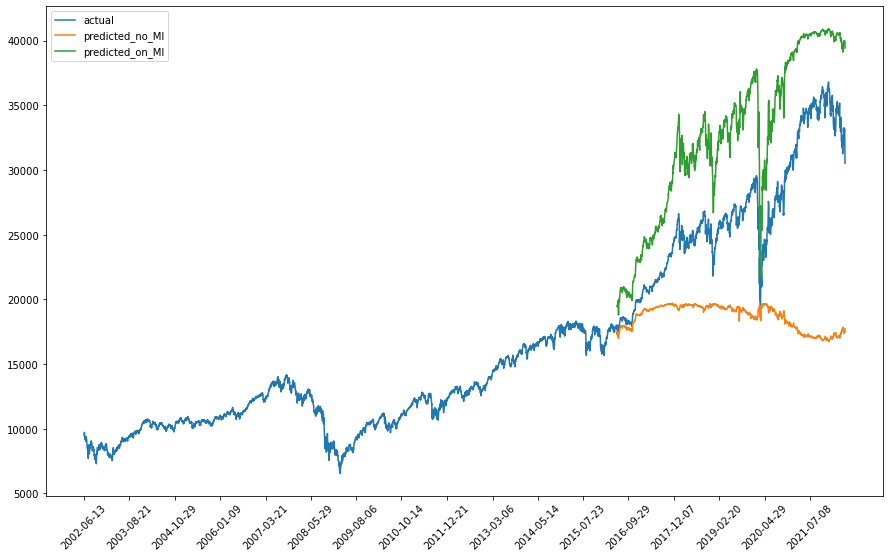

predicted_on_MI:  0.17042605161398922
predicted_no_MI: 0.26242179610782335


In [1124]:
plt.figure(figsize=(15,9))
plt.plot(dj1['Close'].shift(-1), label = "actual")
plt.plot(dj1_no['Close(t+1)'], label = "predicted_no_MI")
plt.plot(dataset['MI_Close(t+1)'][test_len:],label = "predicted_on_MI")
plt.xticks(dj1.index[::300],rotation=45)
plt.legend()
plt.show()
print("predicted_on_MI: ",MAE)
print("predicted_no_MI:",MAE_lstm)